# Import delle librerie

In [24]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
import matplotlib as mpl

# carichiamo i risultati del k-means più serie temporali

In [25]:
with open('./pickles/kmeans_total.pickle', 'rb') as handle:
    kmeans_total = pickle.load(handle)

with open('./pickles/newSeries_total.pickle', 'rb') as handle:
    newSeries_total = pickle.load(handle)

with open('./pickles/rese_total.pickle', 'rb') as handle:
    rese_total = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

In [26]:
# Numero di cluster 

num_cluster = 5

# Rese pulite

newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]


# Andiamo a fare il plot della silhoutte

In [13]:
silhoutte = []

for x in range(0,int(155/5)):
    silhoutte.append([])
    for y in range(0,int(155/5)):
        if(newSeries_total[x,y] is not None):
            silhoutte[-1].append(silhouette_score(newSeries_total[x,y],kmeans_total[x,y],metric="euclidean"))
        else:
            continue

In [14]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

matrice_silhoutte = np.zeros([int(155/5),int(155/5)])

for a,x in zip(silhoutte,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte[x,y] = c

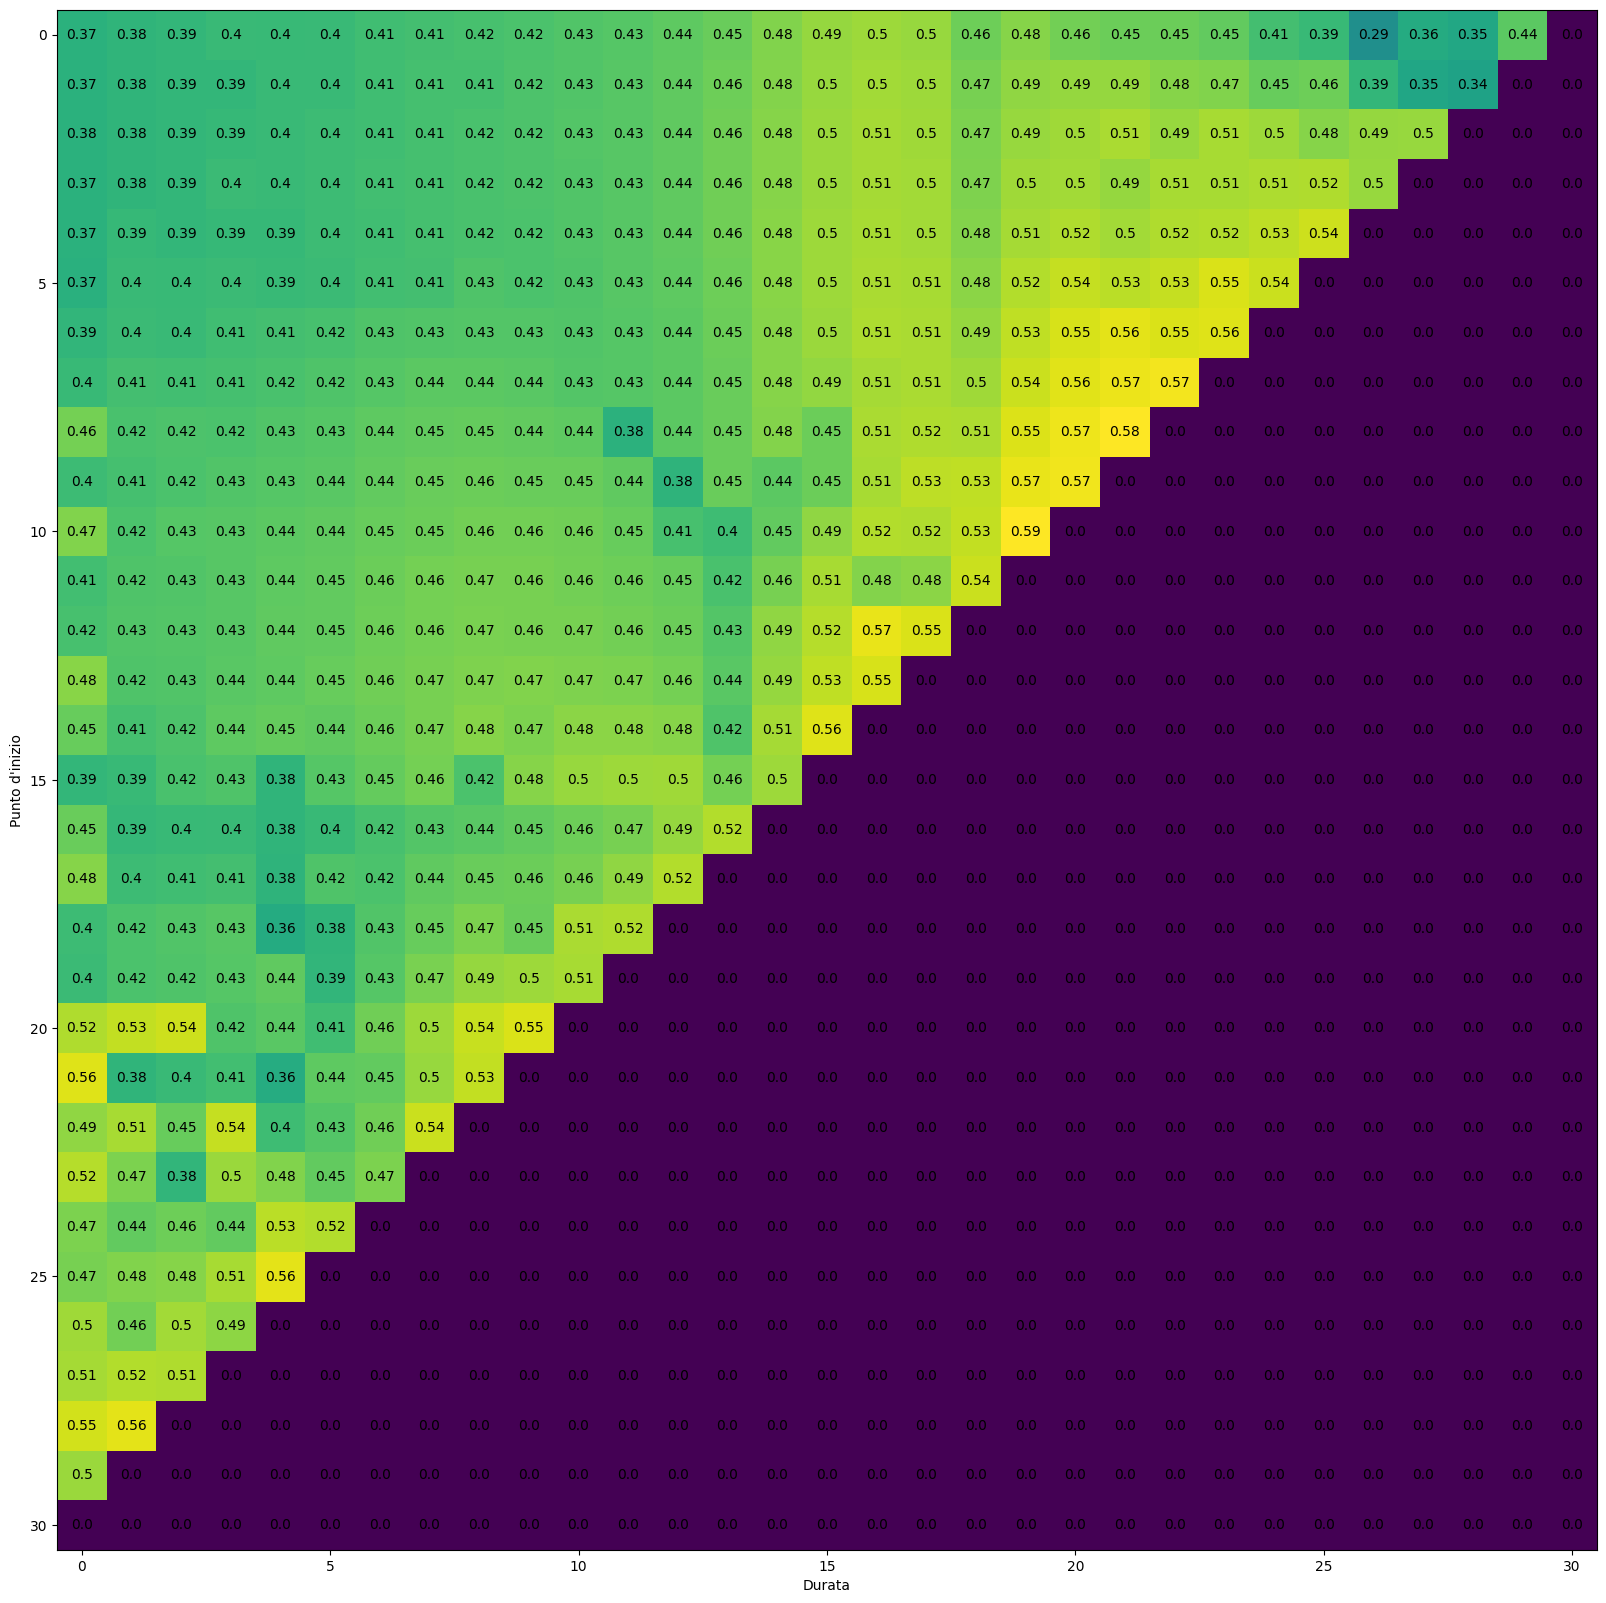

In [15]:

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte.shape[0]):
    for j in range(0,matrice_silhoutte.shape[1]):
        c = np.round(matrice_silhoutte[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

# Metriche di coesione, deviazione standard

In [ ]:
x = int(155/5)
y = int(155/5)

In [31]:
meanStd = np.zeros([x,y,num_cluster])
cluster_deviation = np.zeros([x,y,num_cluster])

for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for k in range(num_cluster):
                mean = np.mean(rese_total[i,j,k])
                sum = 0
                for resa in rese_total[i,j,k]:
                    sum += (resa-mean)**2
                cluster_deviation[i,j,k] = np.sqrt(sum/(len(rese_total[i,j,k])-1))
            meanStd[i,j] = cluster_deviation[i,j].mean()

'''for p in range(0,num_cluster):
    cluster_deviation.append([])



for rese in zip(rese_total):
    meanStd.append([])
    for p in range(0,num_cluster):
        cluster_deviation[p].append([])
        
    meanValue = []

    for resa in rese:
        meanValue.append(np.mean(resa))

    # Calcolo le metriche di coesione
    
    coesion = []
    for mean,resa,cluster in zip(meanValue,rese,cluster_deviation):   
        sum = 0
        cluster[-1].append([])
        for c in resa:
            sum += (c-mean)**2
        
        coesion.append(np.sqrt(sum/(len(resa)-1)))
        cluster[-1][-1].append(np.sqrt(sum/(len(resa)-1)))
    meanStd[-1].append(np.array(coesion).mean())'''

        

C:\Users\Leo\AppData\Local\Temp\ipykernel_18396\590613160.py:12: RuntimeWarning: invalid value encountered in double_scalars
  cluster_deviation[i,j,k] = np.sqrt(sum/(len(rese_total[i,j,k])-1))


'for p in range(0,num_cluster):\n    cluster_deviation.append([])\n\n\n\nfor rese in zip(rese_total):\n    meanStd.append([])\n    for p in range(0,num_cluster):\n        cluster_deviation[p].append([])\n        \n    meanValue = []\n\n    for resa in rese:\n        meanValue.append(np.mean(resa))\n\n    # Calcolo le metriche di coesione\n    \n    coesion = []\n    for mean,resa,cluster in zip(meanValue,rese,cluster_deviation):   \n        sum = 0\n        cluster[-1].append([])\n        for c in resa:\n            sum += (c-mean)**2\n        \n        coesion.append(np.sqrt(sum/(len(resa)-1)))\n        cluster[-1][-1].append(np.sqrt(sum/(len(resa)-1)))\n    meanStd[-1].append(np.array(coesion).mean())'

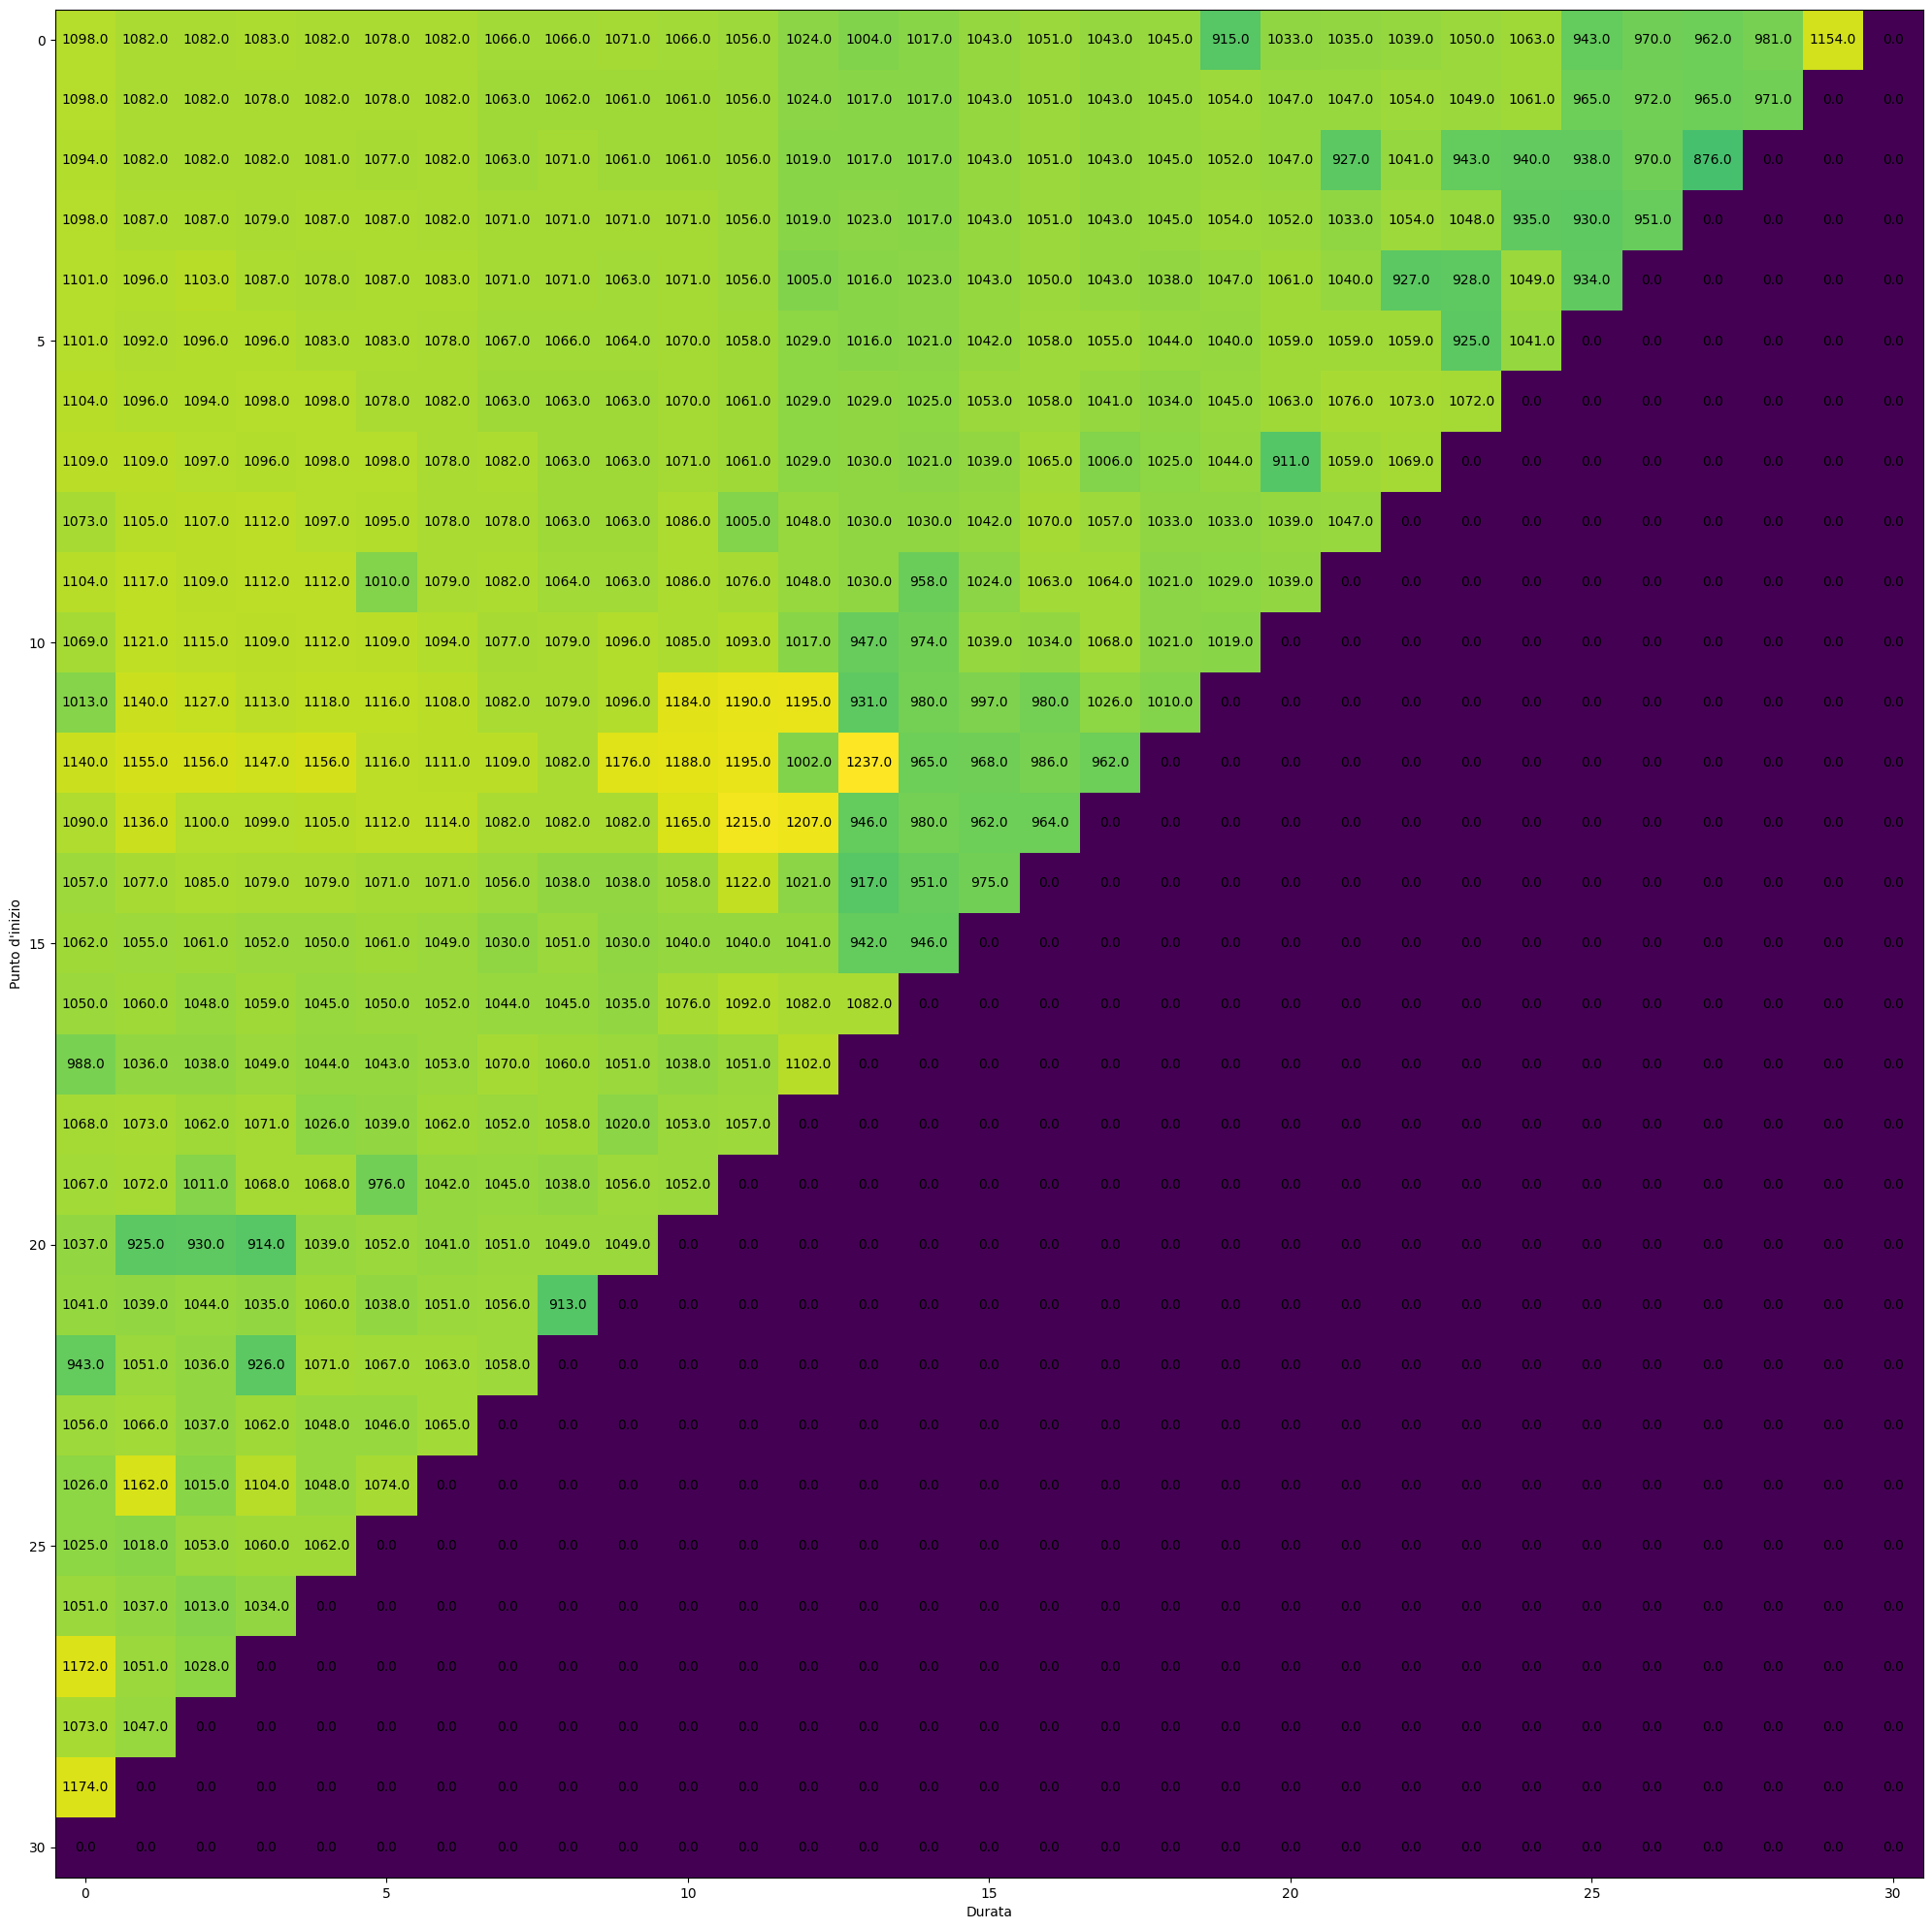

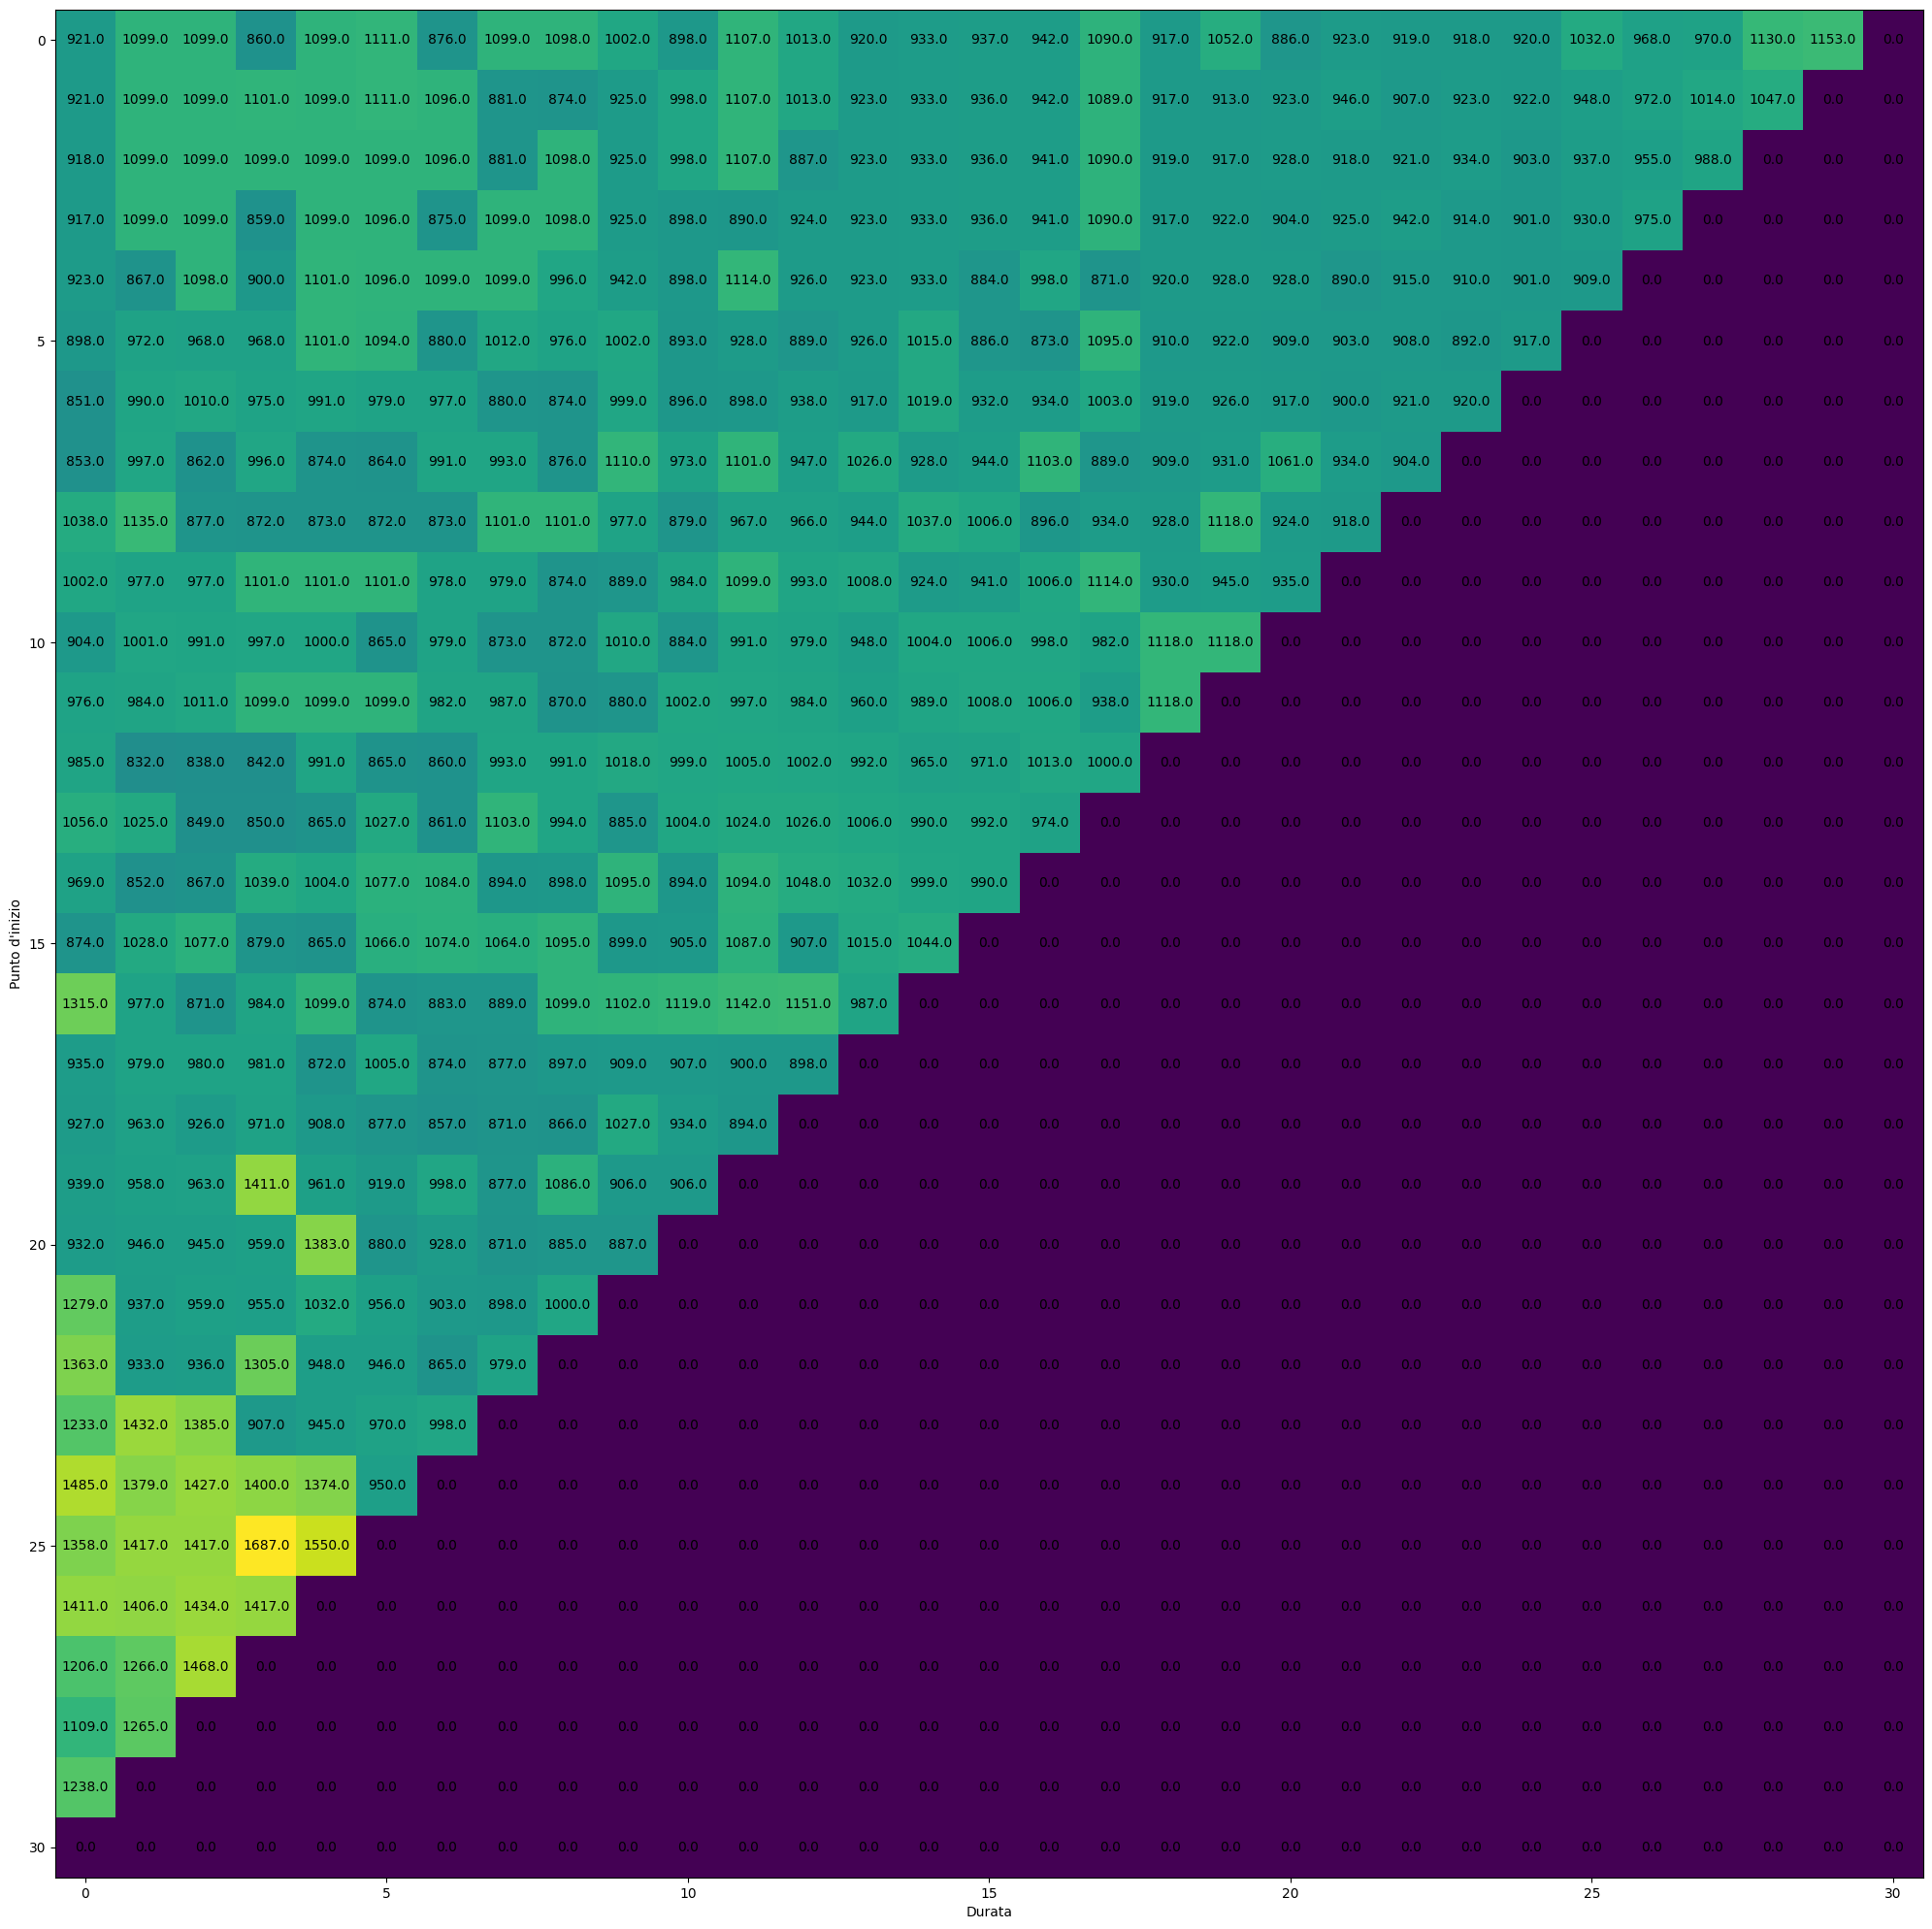

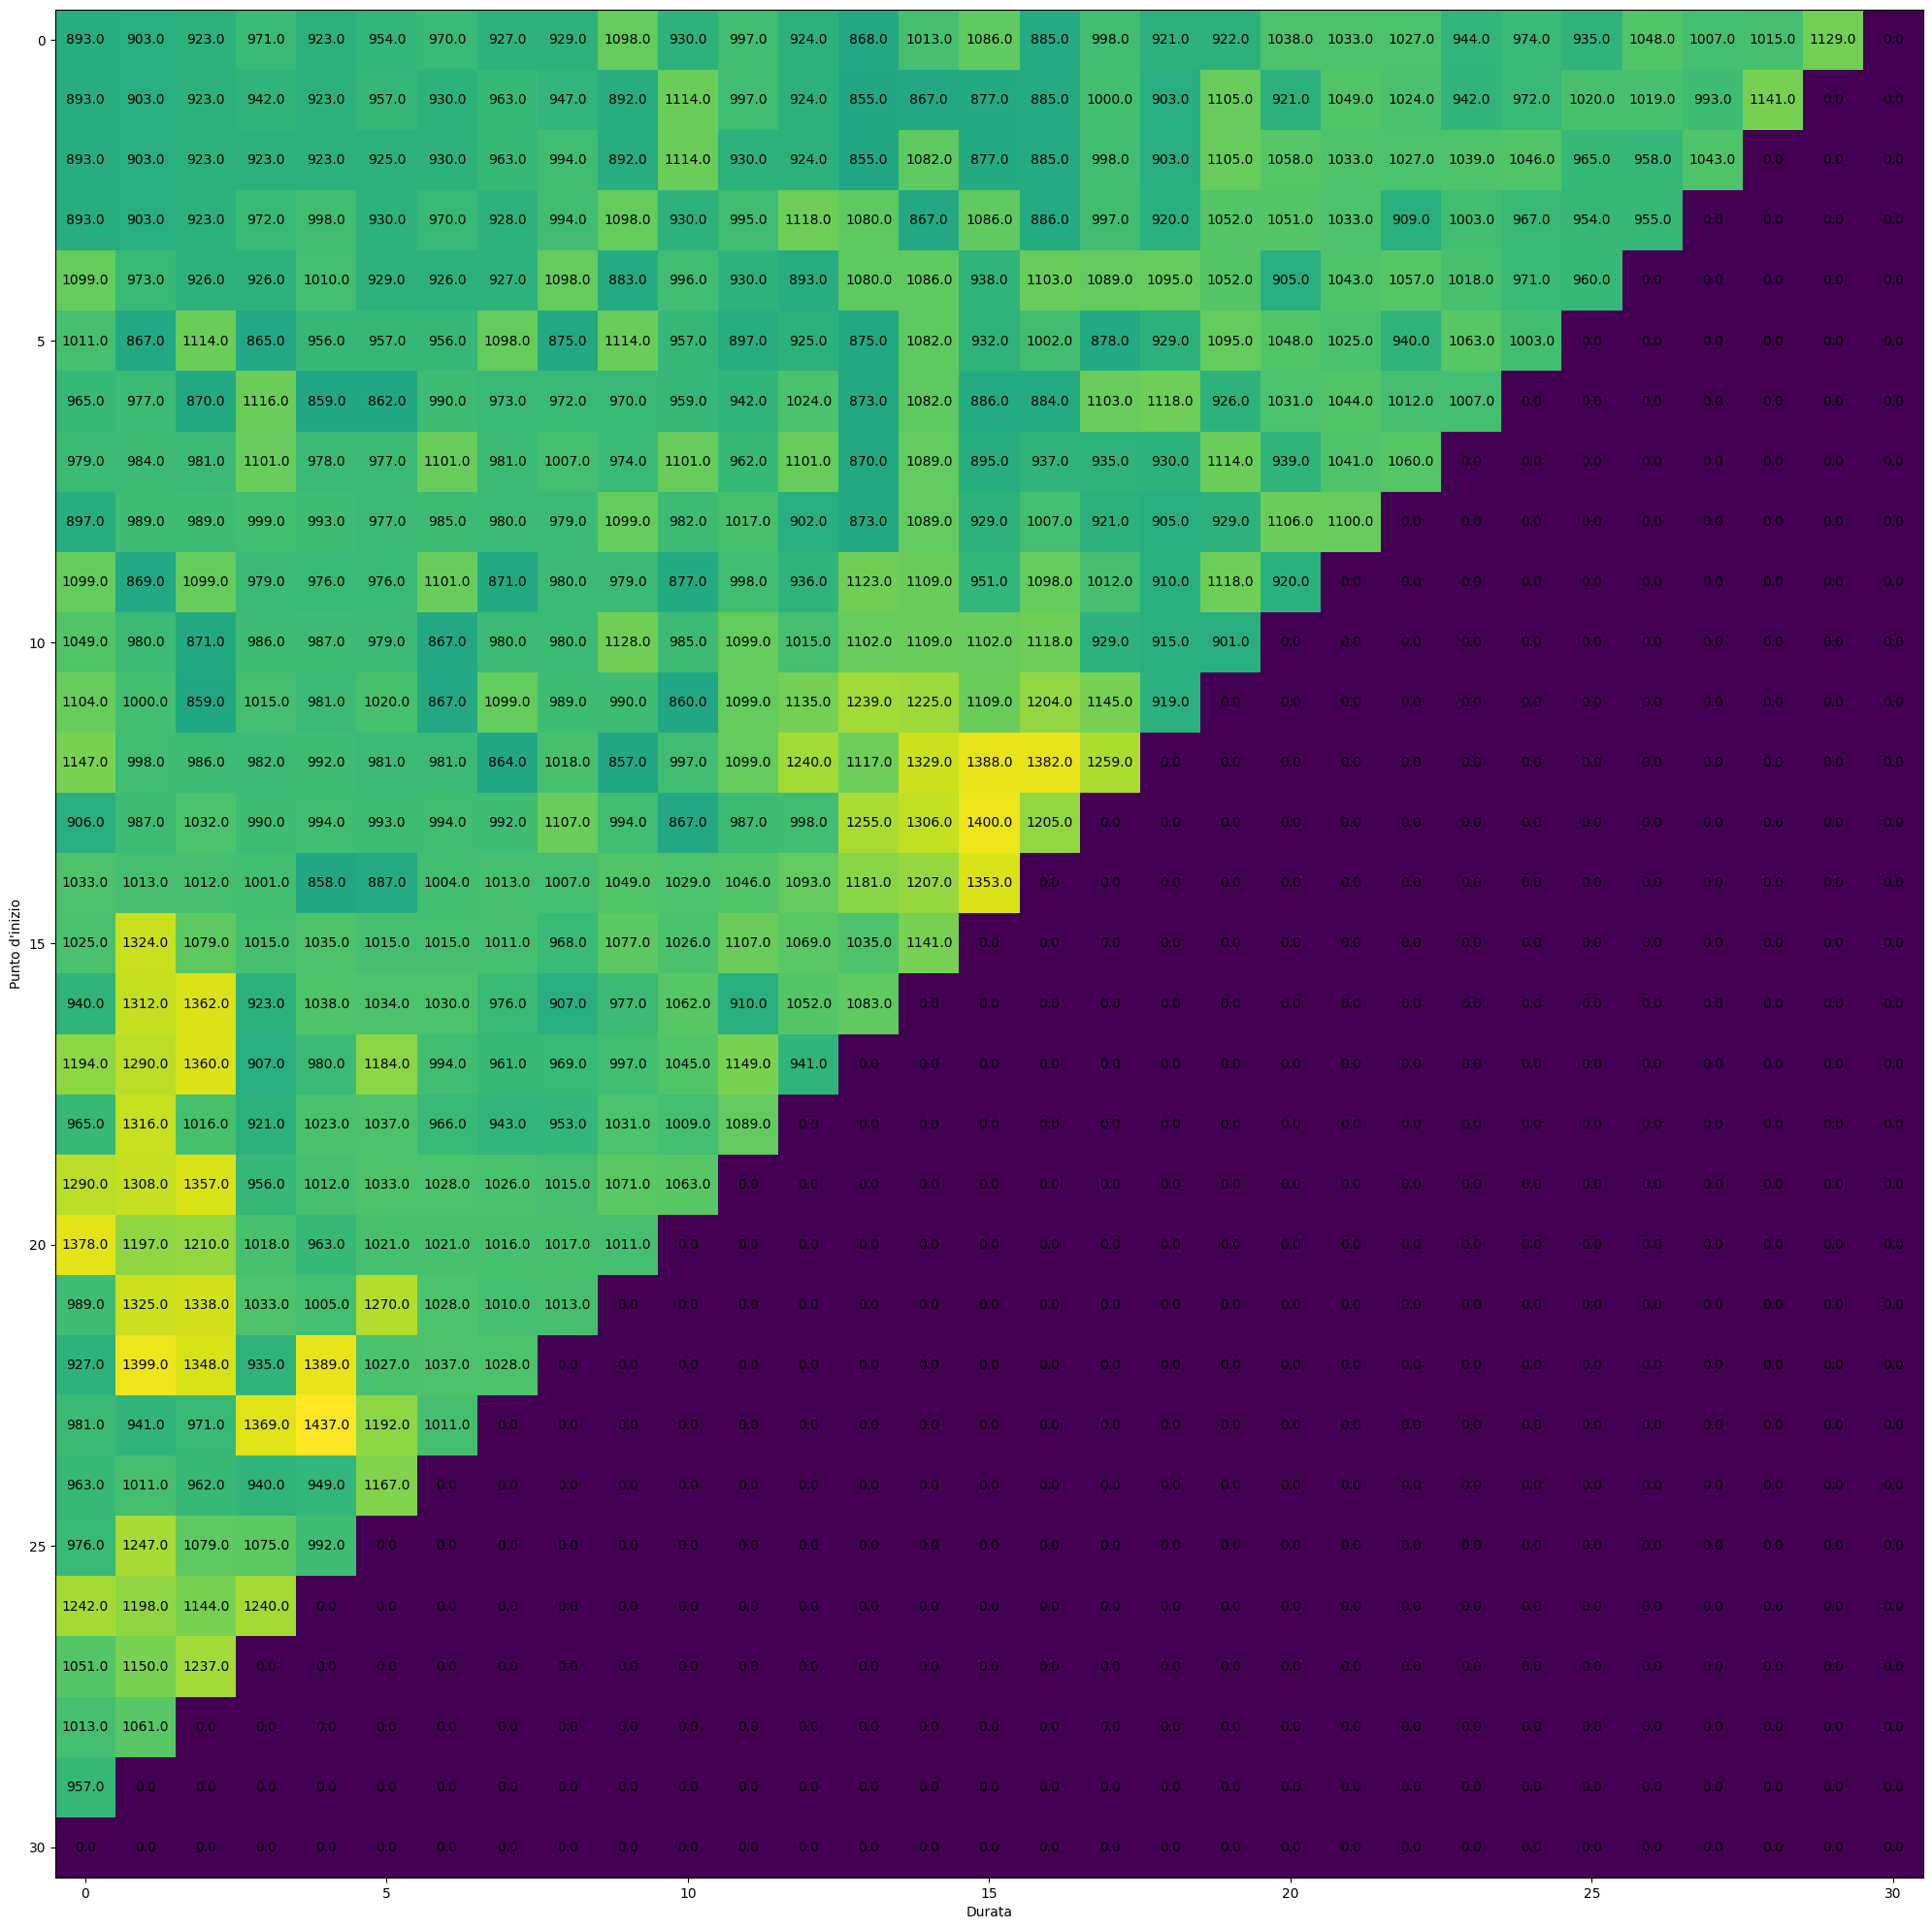

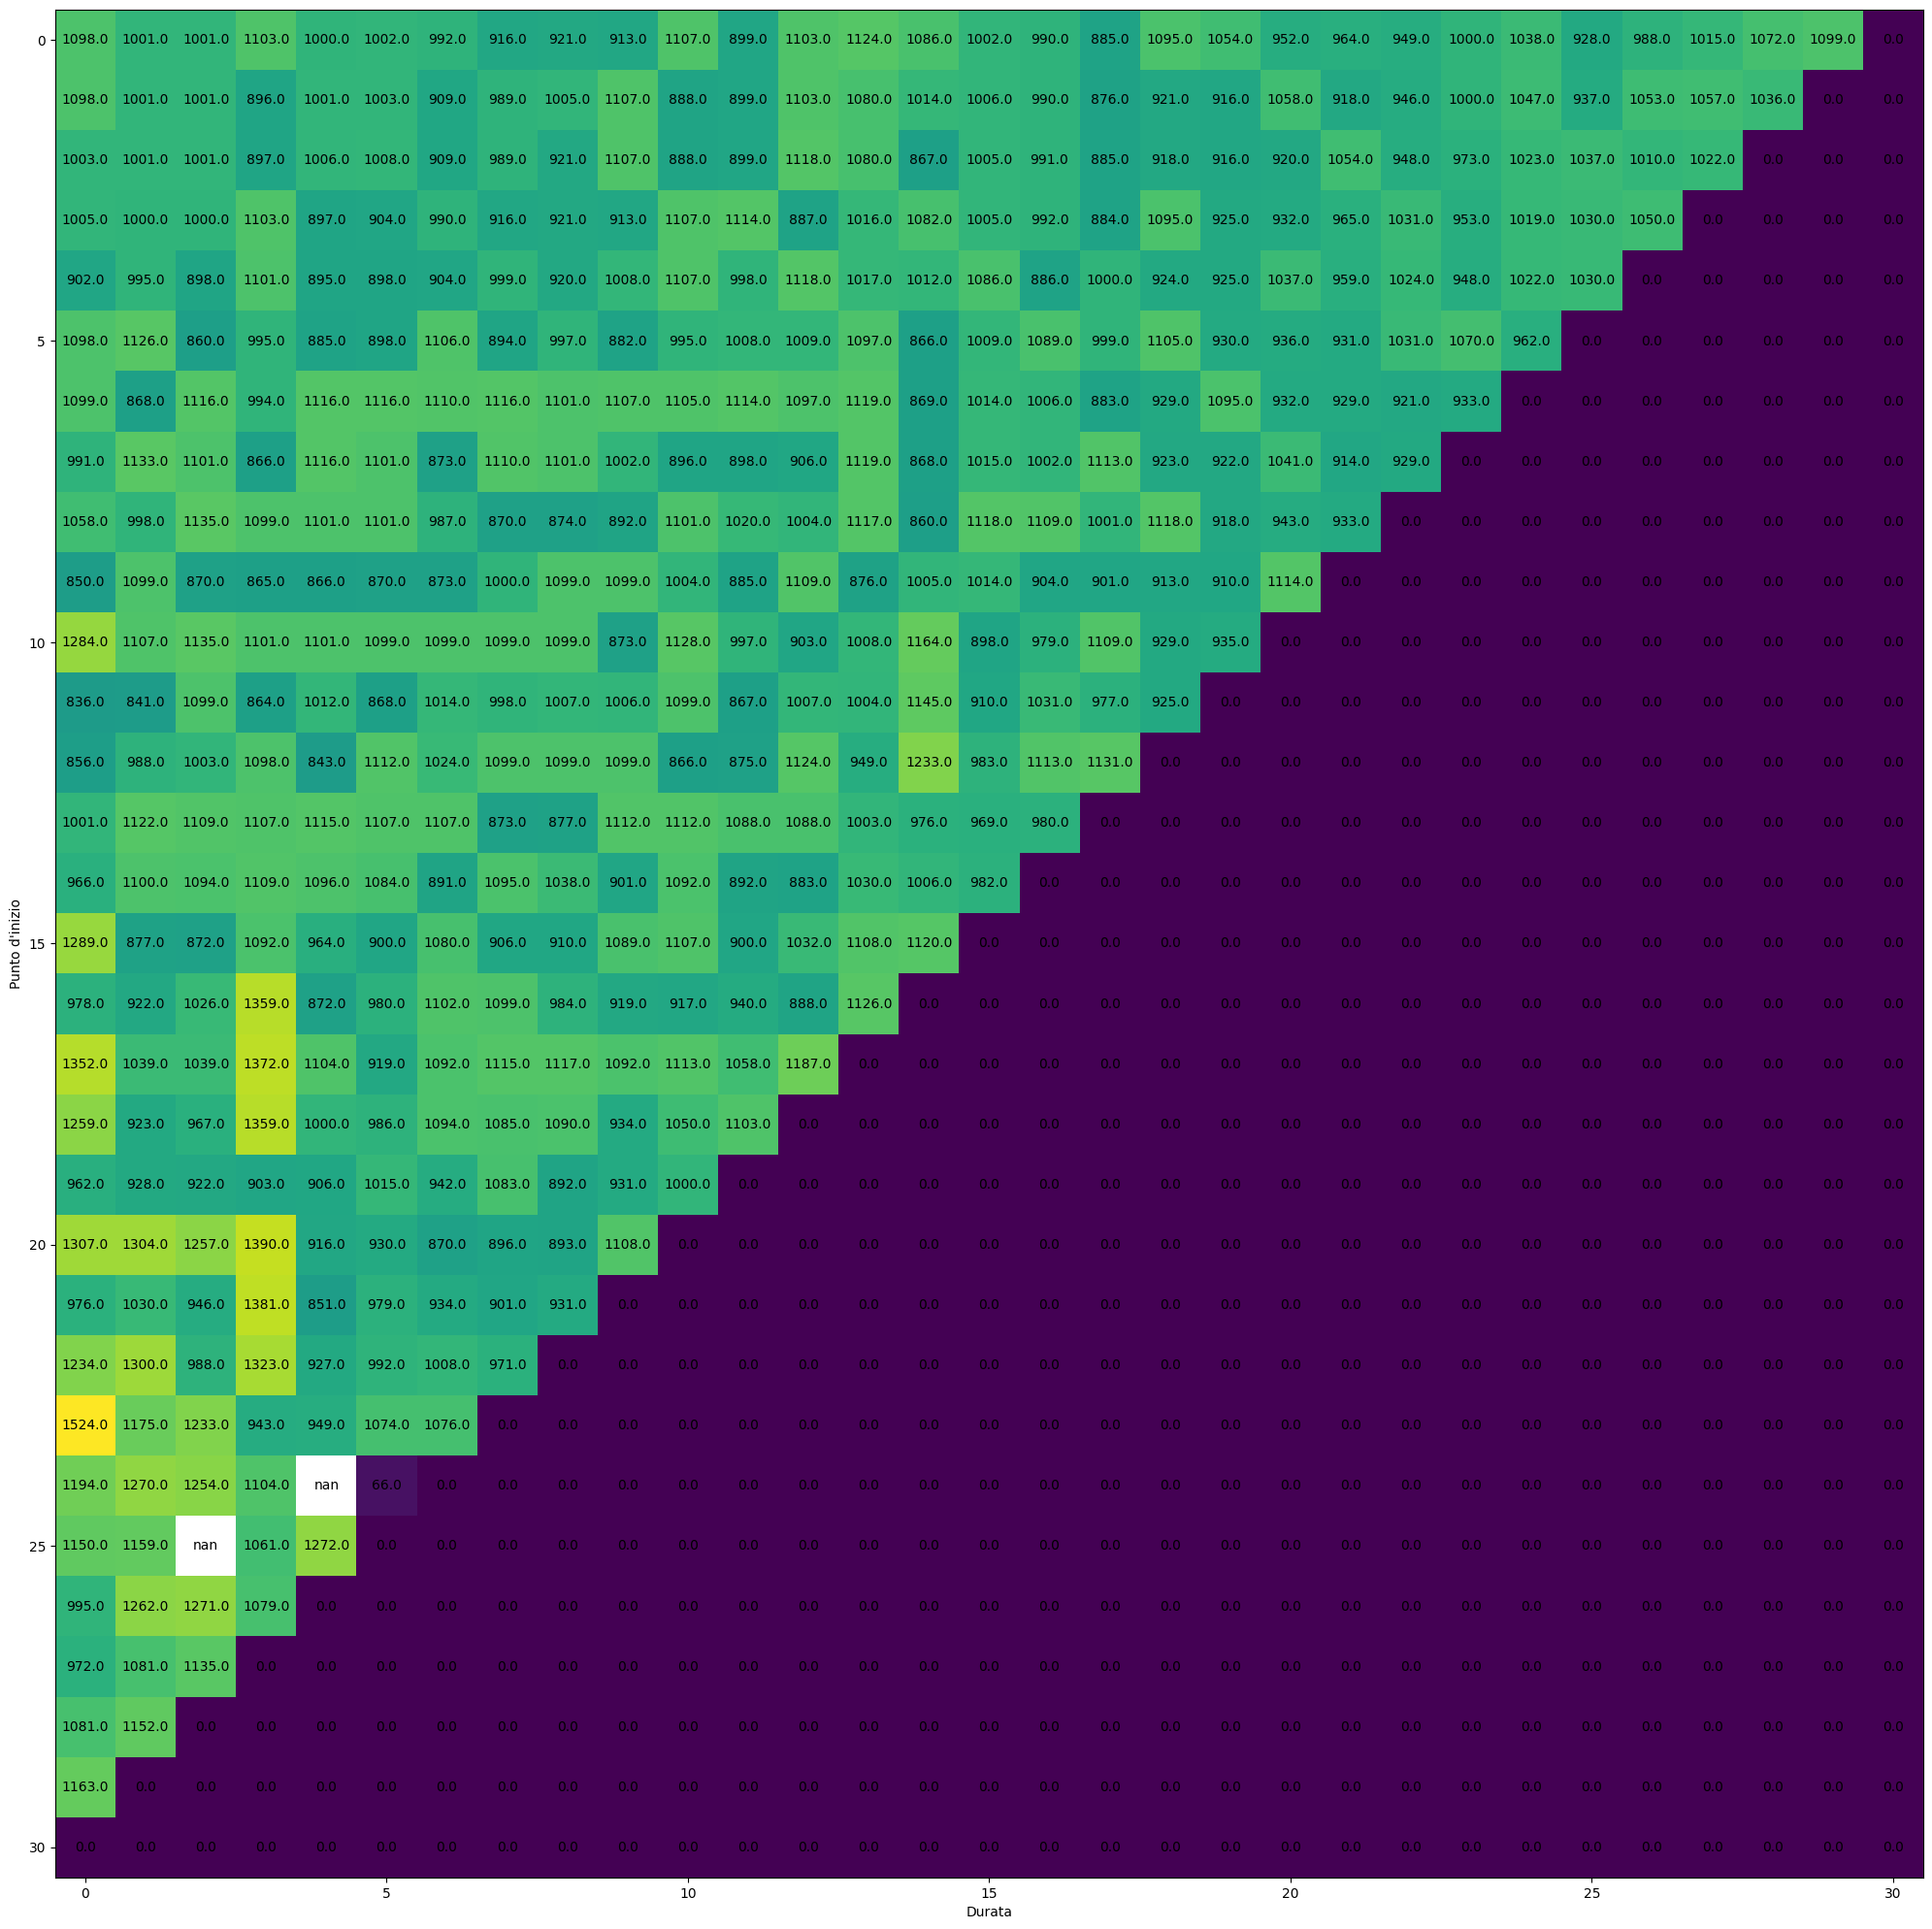

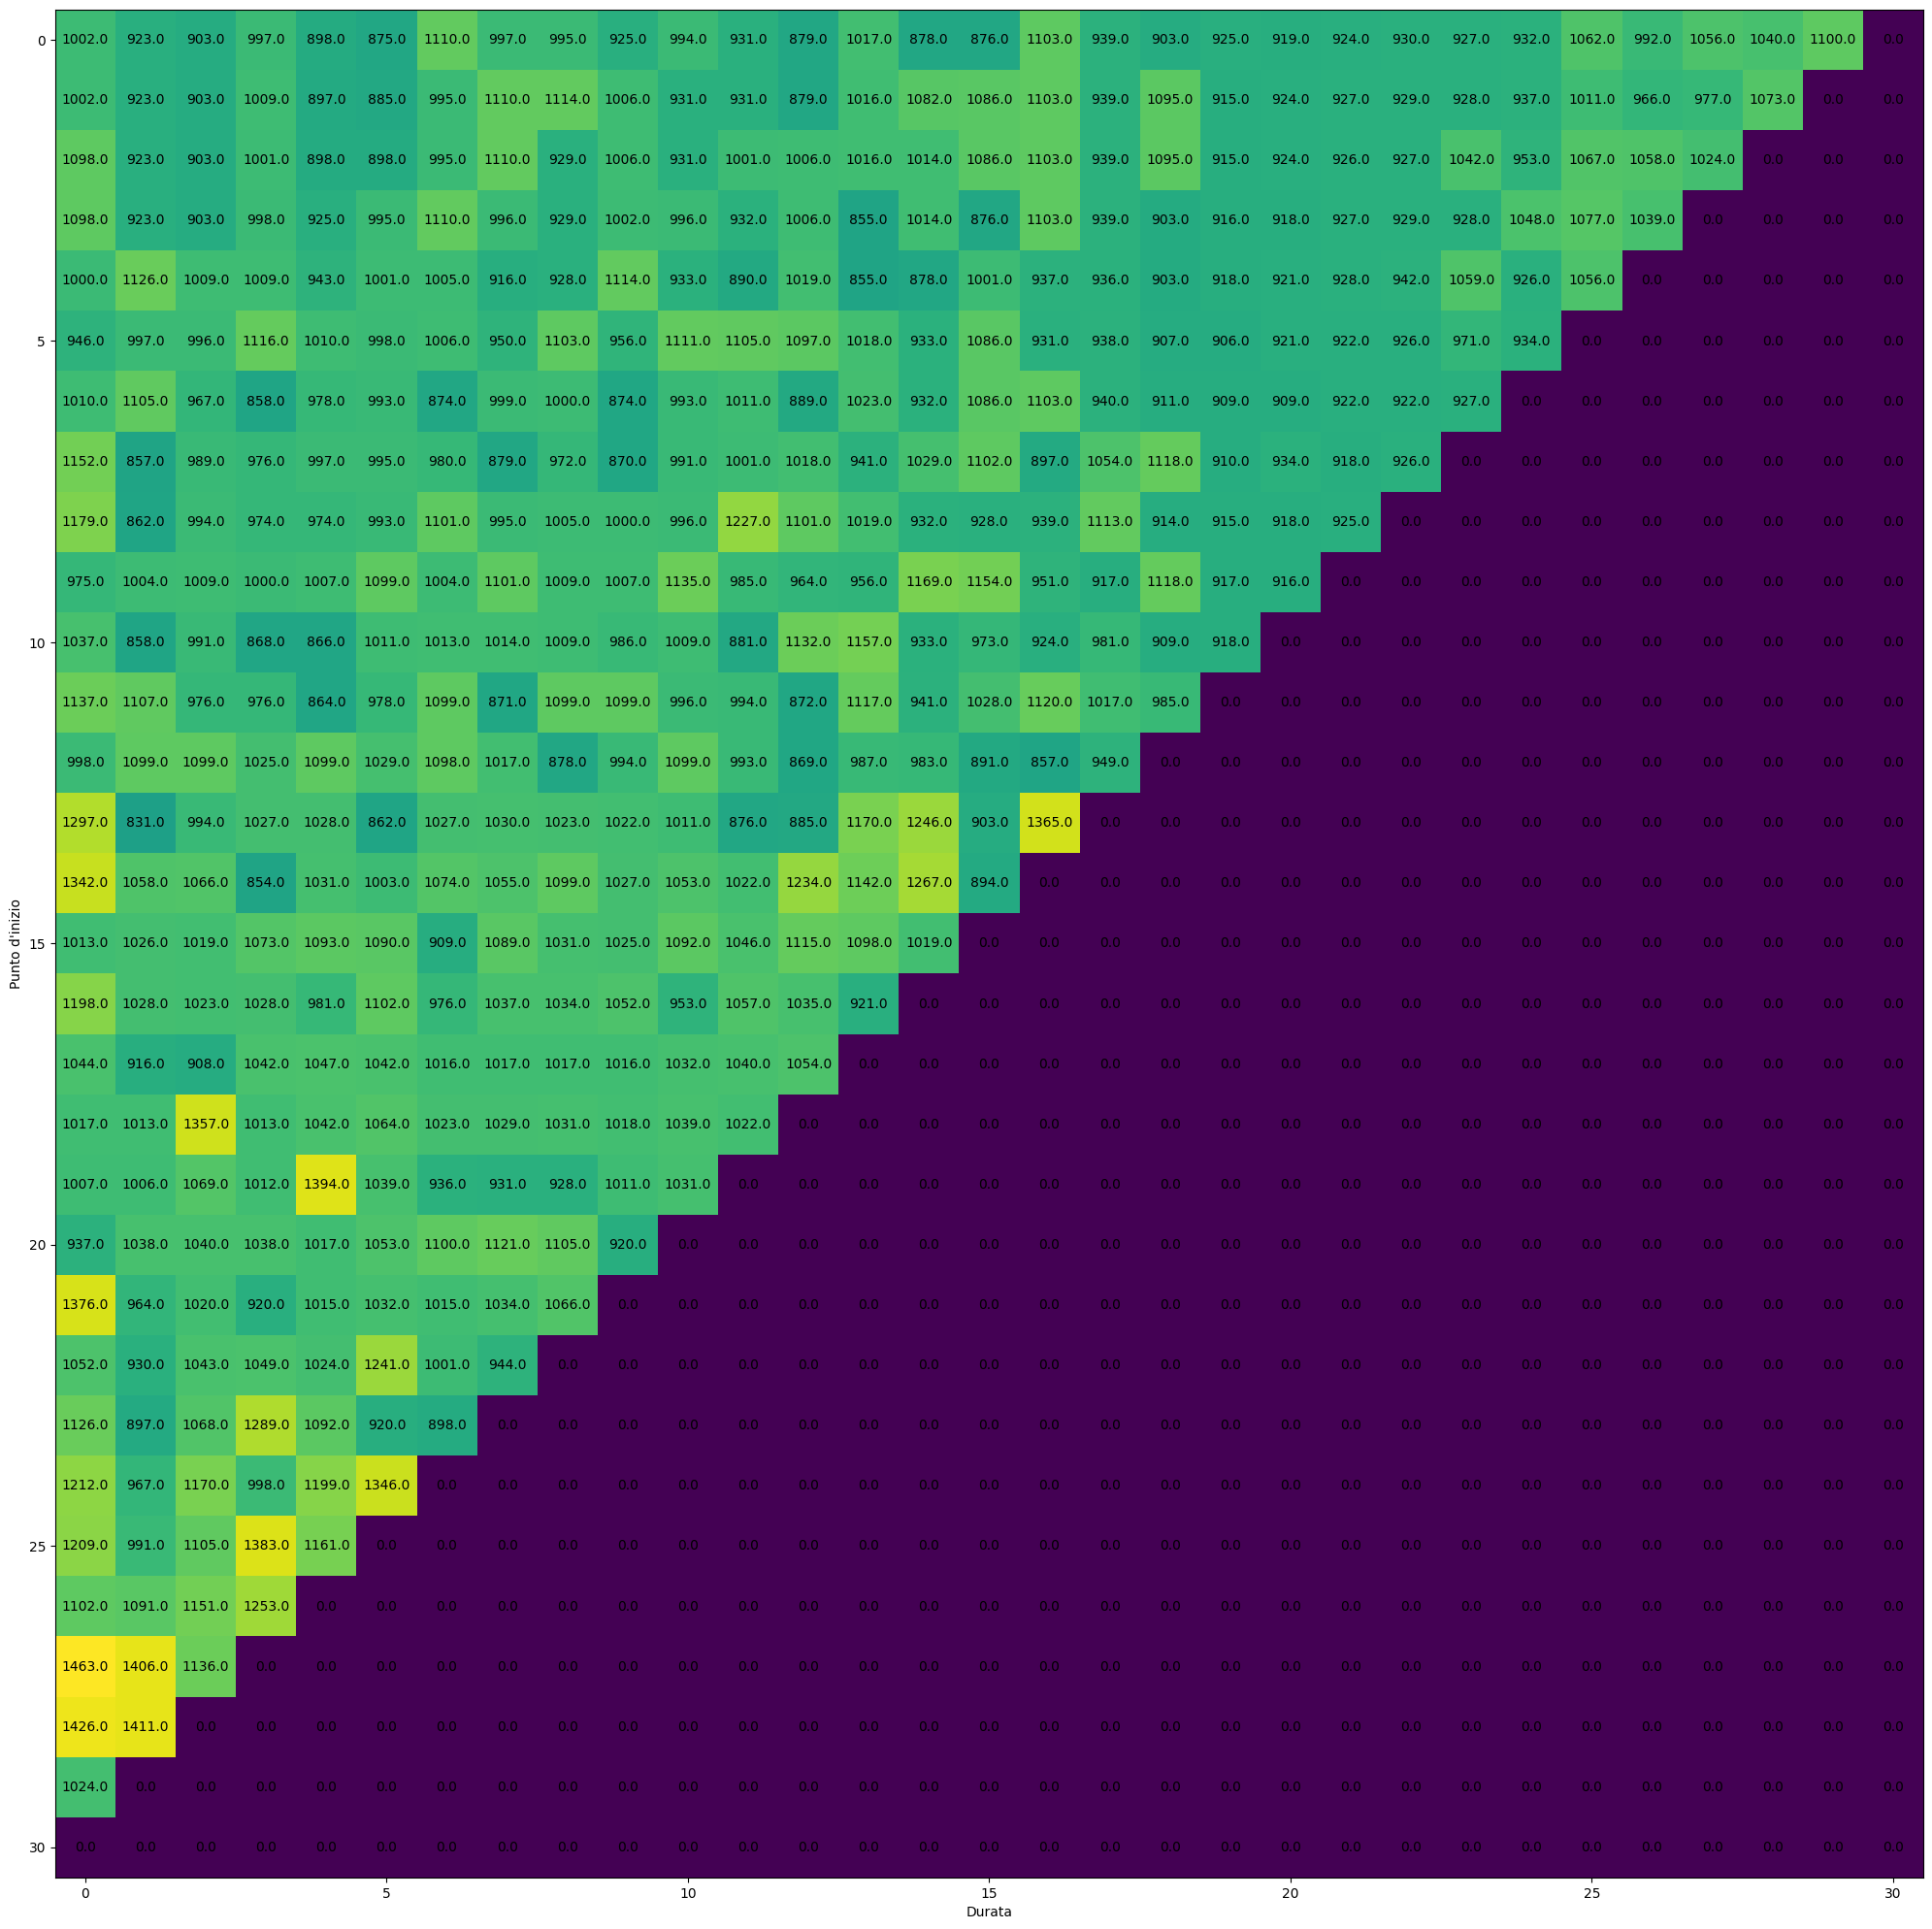

In [33]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(cluster_deviation[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,cluster_deviation.shape[0]):
        for j in range(0,cluster_deviation.shape[1]):
            c = np.round(cluster_deviation[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Analisi della separazione con somma delle distanze tra un i punti di un cluster e tutti gli altri

In [36]:
# Altra metrica di separazione 

sum_separation = np.zeros([x,y,num_cluster])

'''for row_r,y in zip(rese_total,range(0,len(rese_total))):
    sum_separation.append([])
    sum_separation[-1].append([])
    for col_rese,x in zip(row_r,range(0,len(row_r))):
        sum = 0
        sum_separation[-1][-1].append([])'''
        

for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for a,resaj in zip(rese_total[i,j,:],range(num_cluster)):
                sum = 0
                for b,resai in zip(rese_total[i,j,:],range(num_cluster)):
                    if(resai == resaj):
                        continue
                    for c in a:
                        for d in b:
                            sum += abs(c-d)
                sum_separation[i,j,resaj] = ((sum/(len(newResa3)-len(a))))/len(a)

        

In [37]:
print(len(rese_total))
#print(rese_total[1])
print(len(rese_total[1][0]))
print(rese_total)


31
5
[[[array([ 5594.4,  5500.4,  7282.1,  7088.8,  7975.3,  6793.2,  8328.1,
           8437.5,  7384.6,  6835.3,  7638.5,  7900.5,  7378.4,  8119.4,
           7708.8,  7466.2,  7539.3,  7755.2,  8783.8,  7730.3,  8039.2,
           8194.9,  7470.6,  7695.6,  9629.4,  9655.9,  8602.5,  5763.4,
           7490. ,  8496. ,  8233.7,  7860.4,  9570.3,  9053.9,  9765.6,
           5538. ,  7226. ,  7297.1,  8085.7,  7404.4,  7638.5,  7613.4,
           9858.6,  8690.8,  8627.3,  5555.6,  7726.9,  8064. ,  7650.5,
           7692.3,  6497.4,  6158. ,  6784.3,  8243.7, 10151.3, 10223.8,
           9659.1,  5193.7,  7936.5,  8806. ,  8190. ,  8645.9,  7177.5,
           7800.6,  6839.9,  6789.3,  7949.3,  8954.7,  9705. ,  9889.2,
           5230.9,  7749.6,  7820.5,  8158.5,  8364.2,  6944.4,  7427.5,
           7921.8,  5705.1,  6393.6,  7886.7,  9452.2,  9803.9,  9645.1,
           5524.2,  8127.6,  8365.5,  8468.6,  7837. ,  5833.3,  7729.5,
           9027.8, 10353.9,  9879. ,  6927.9, 

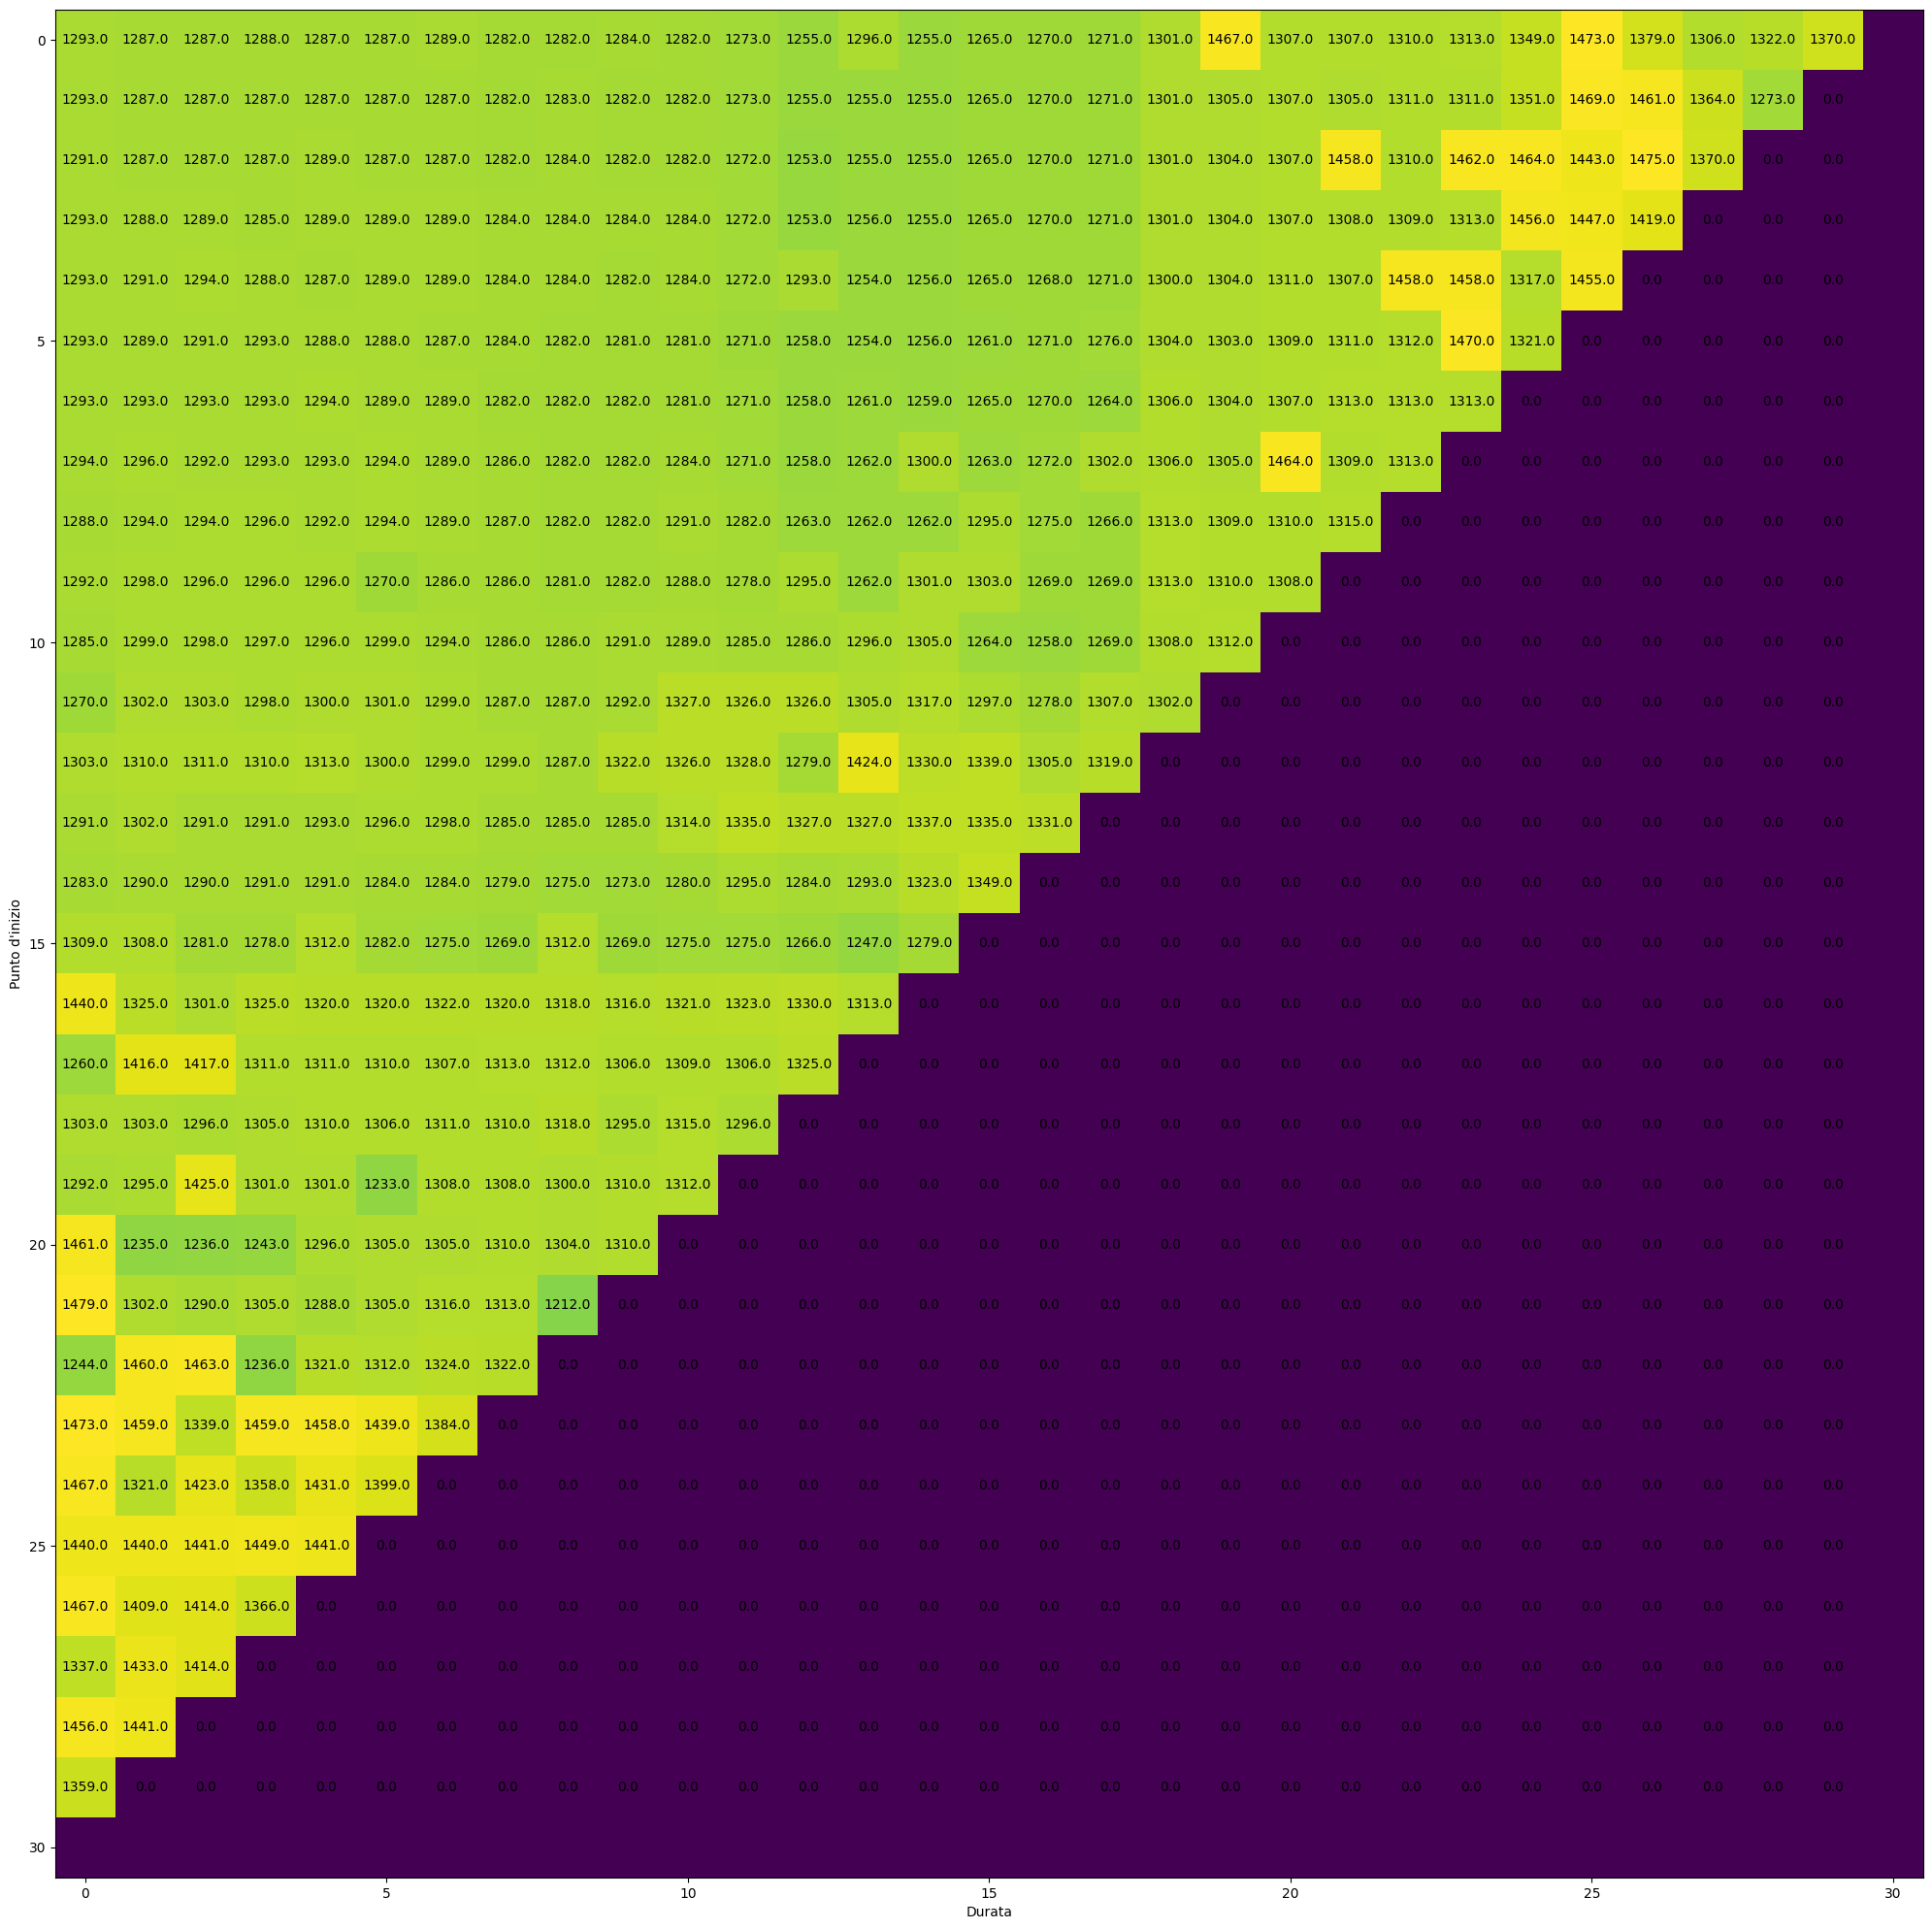

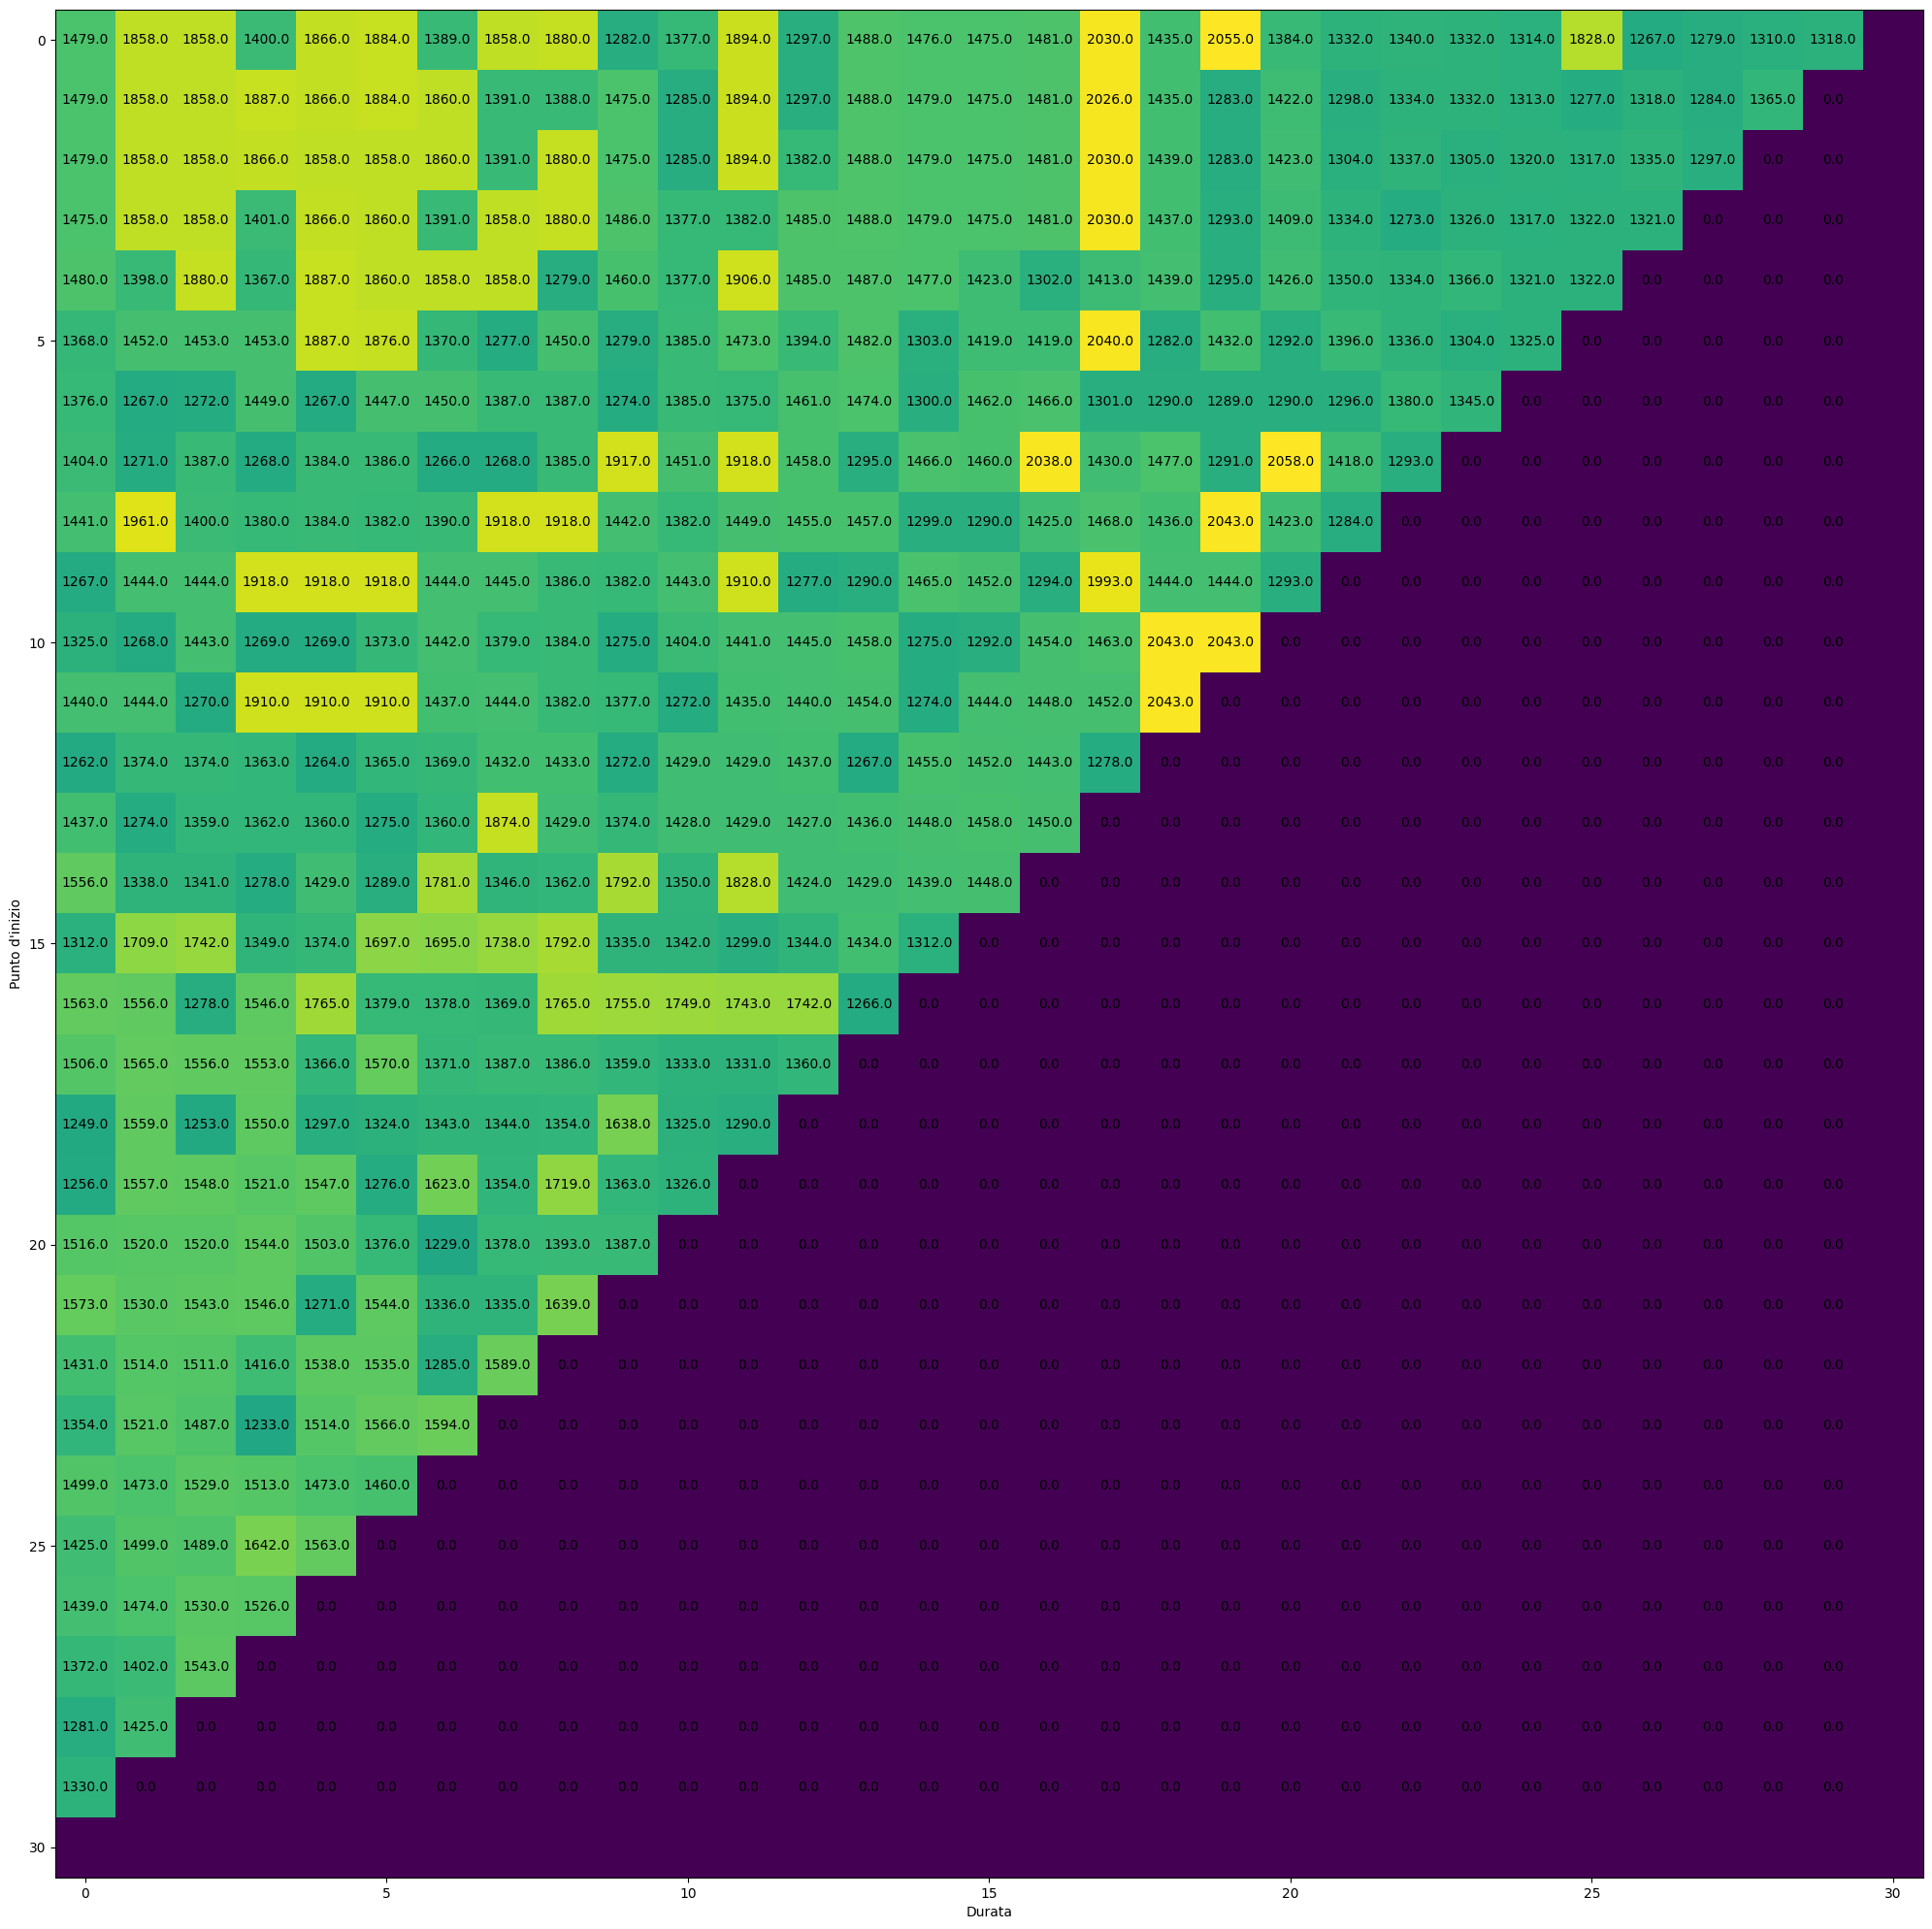

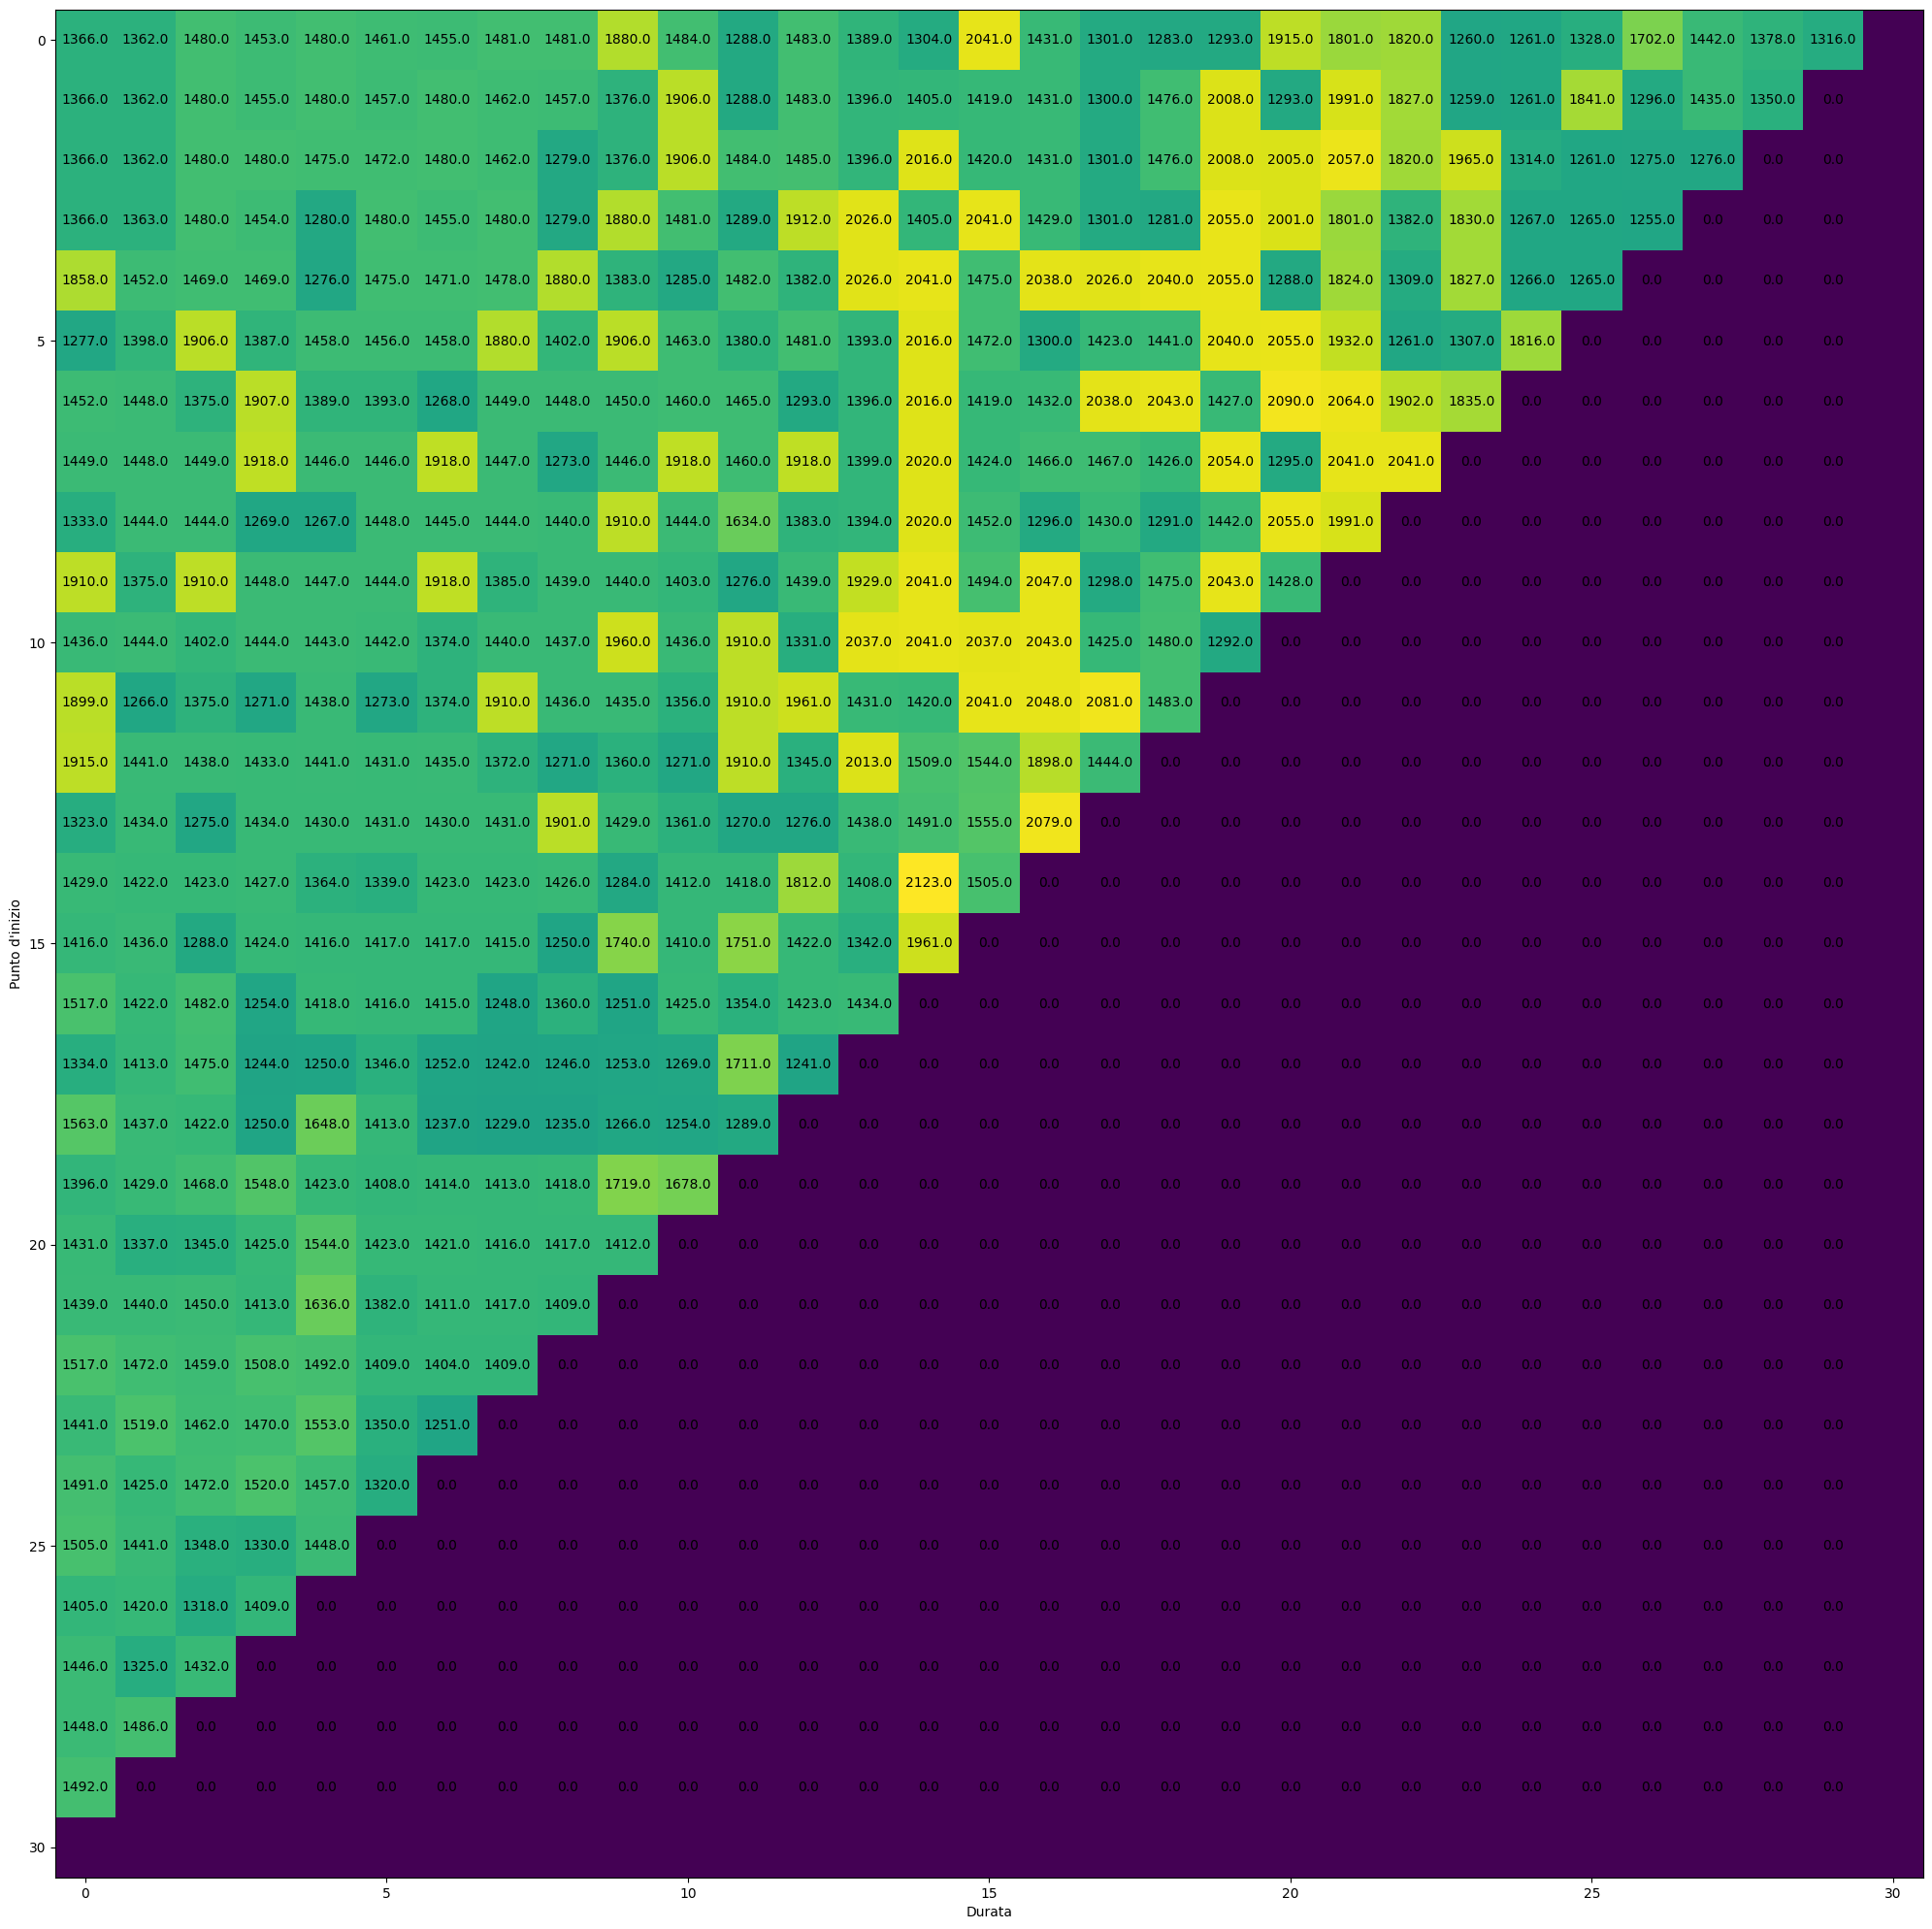

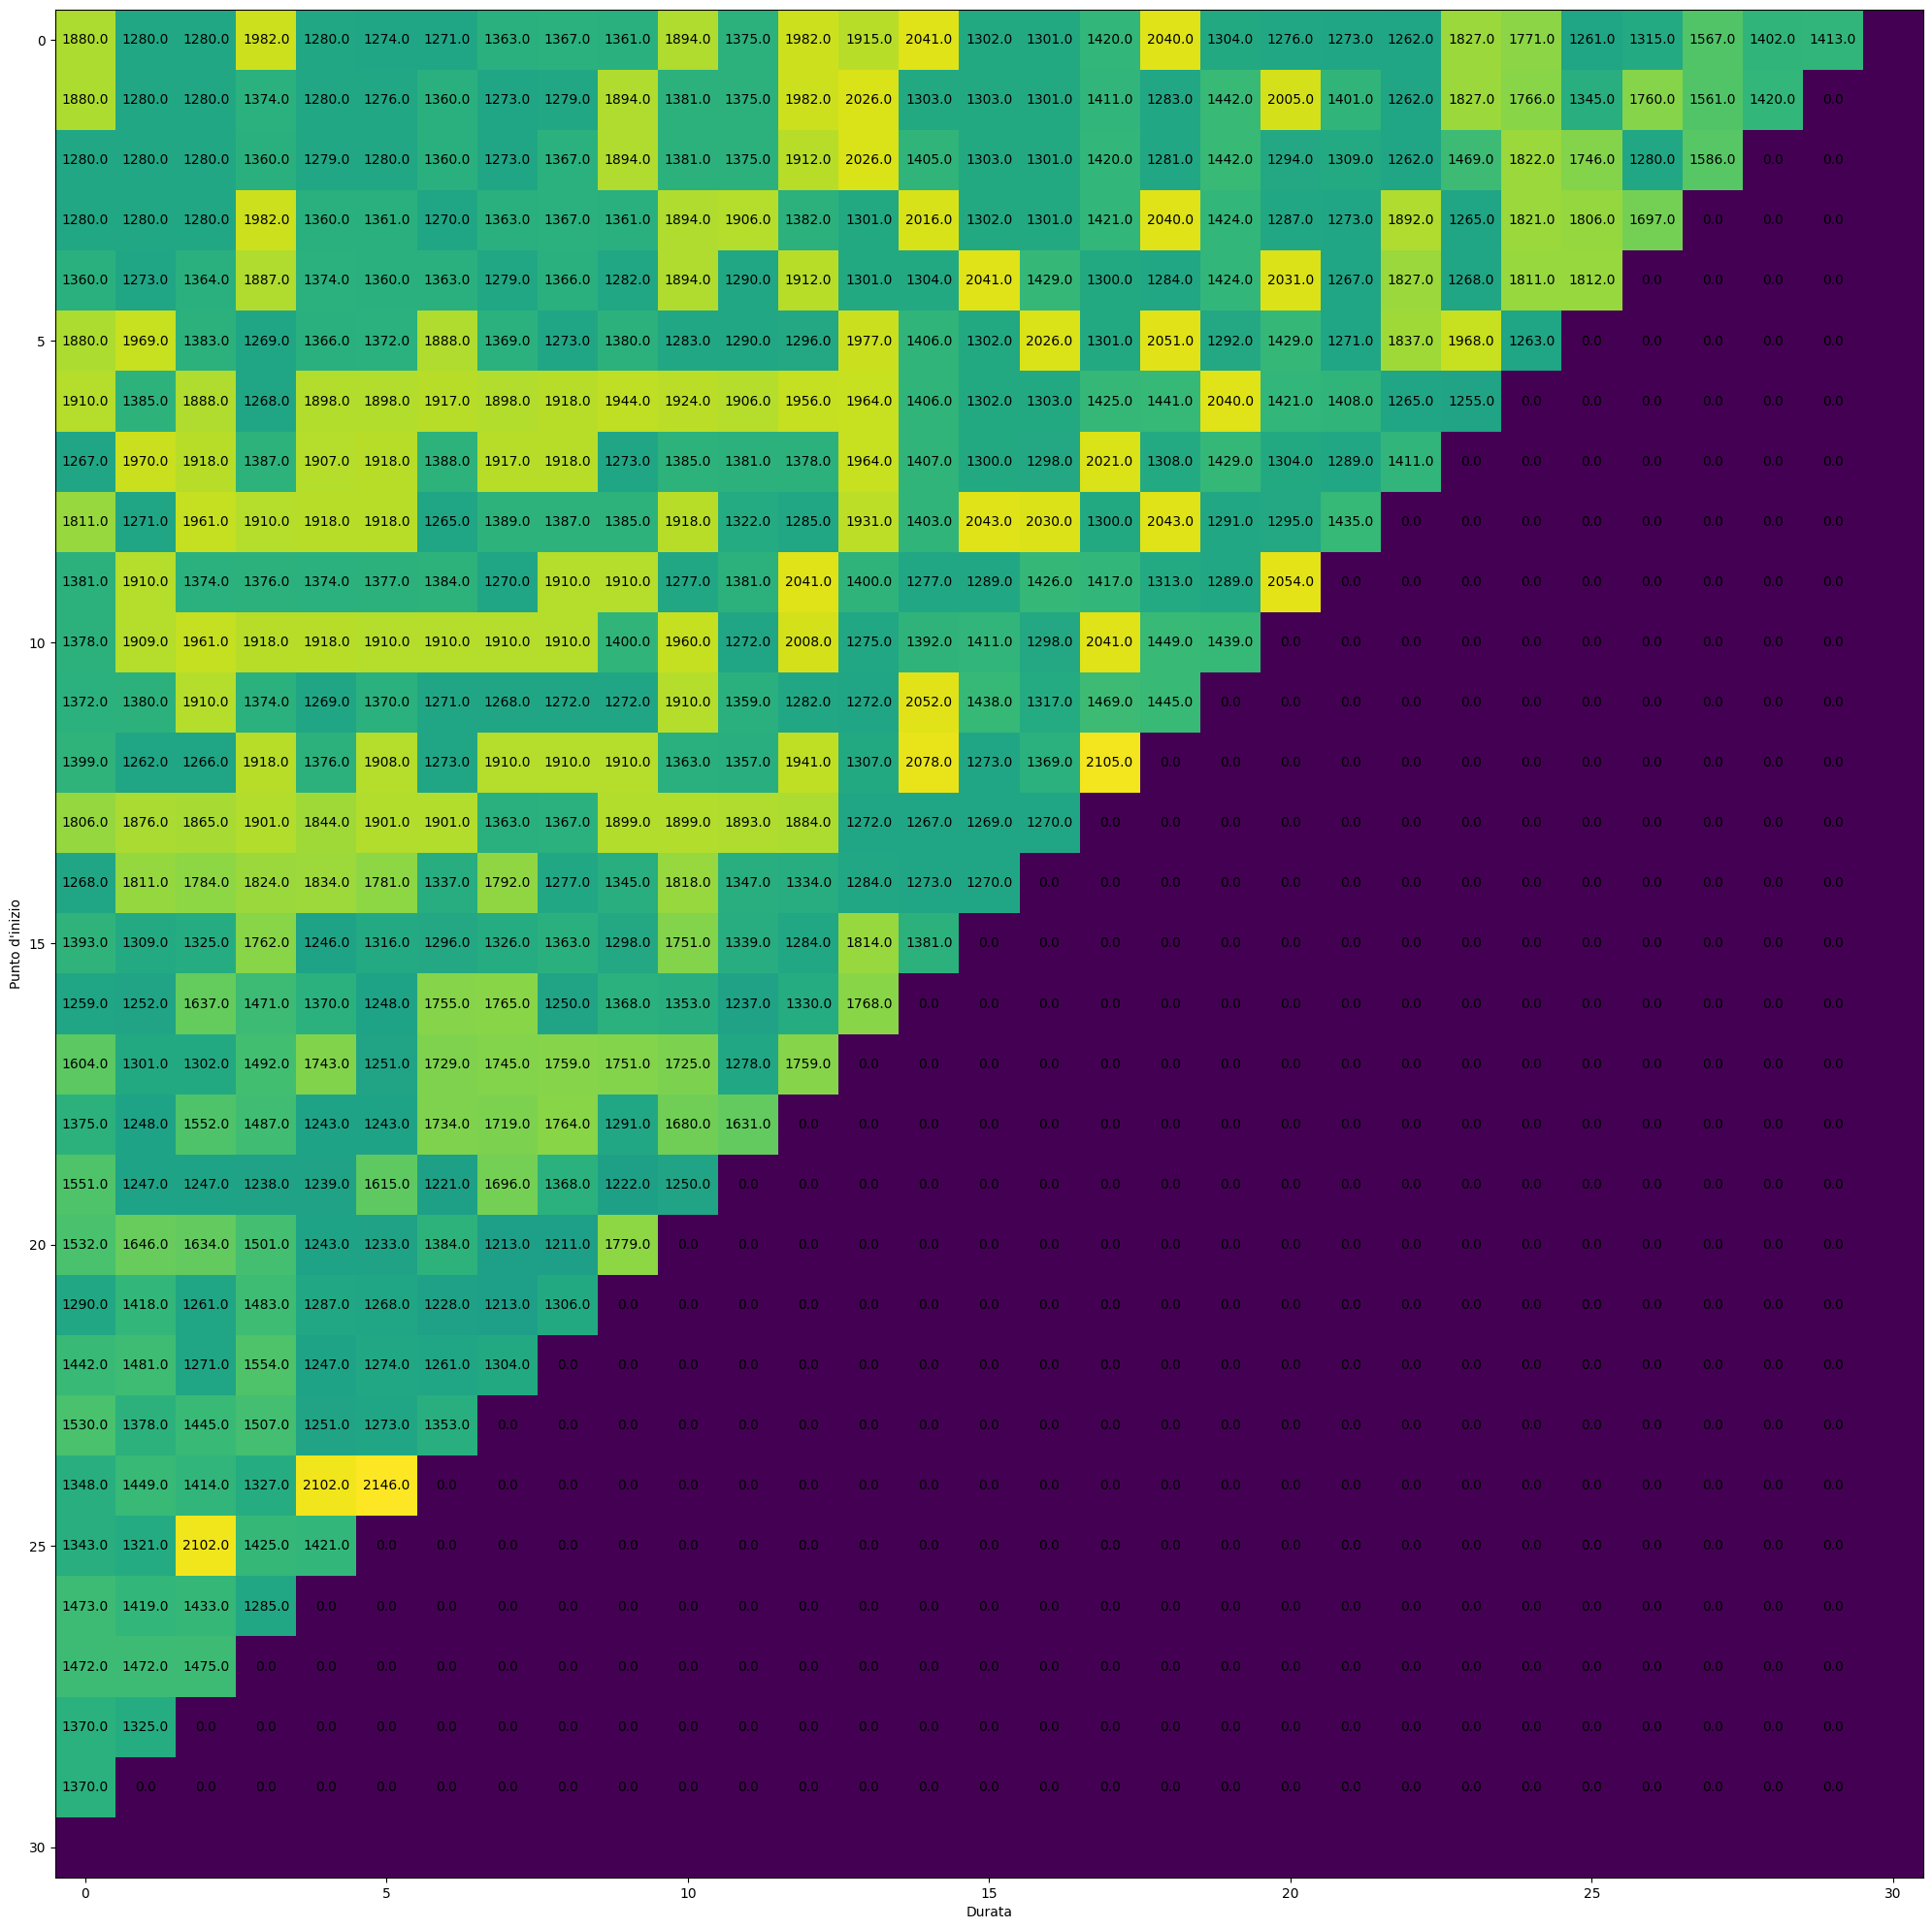

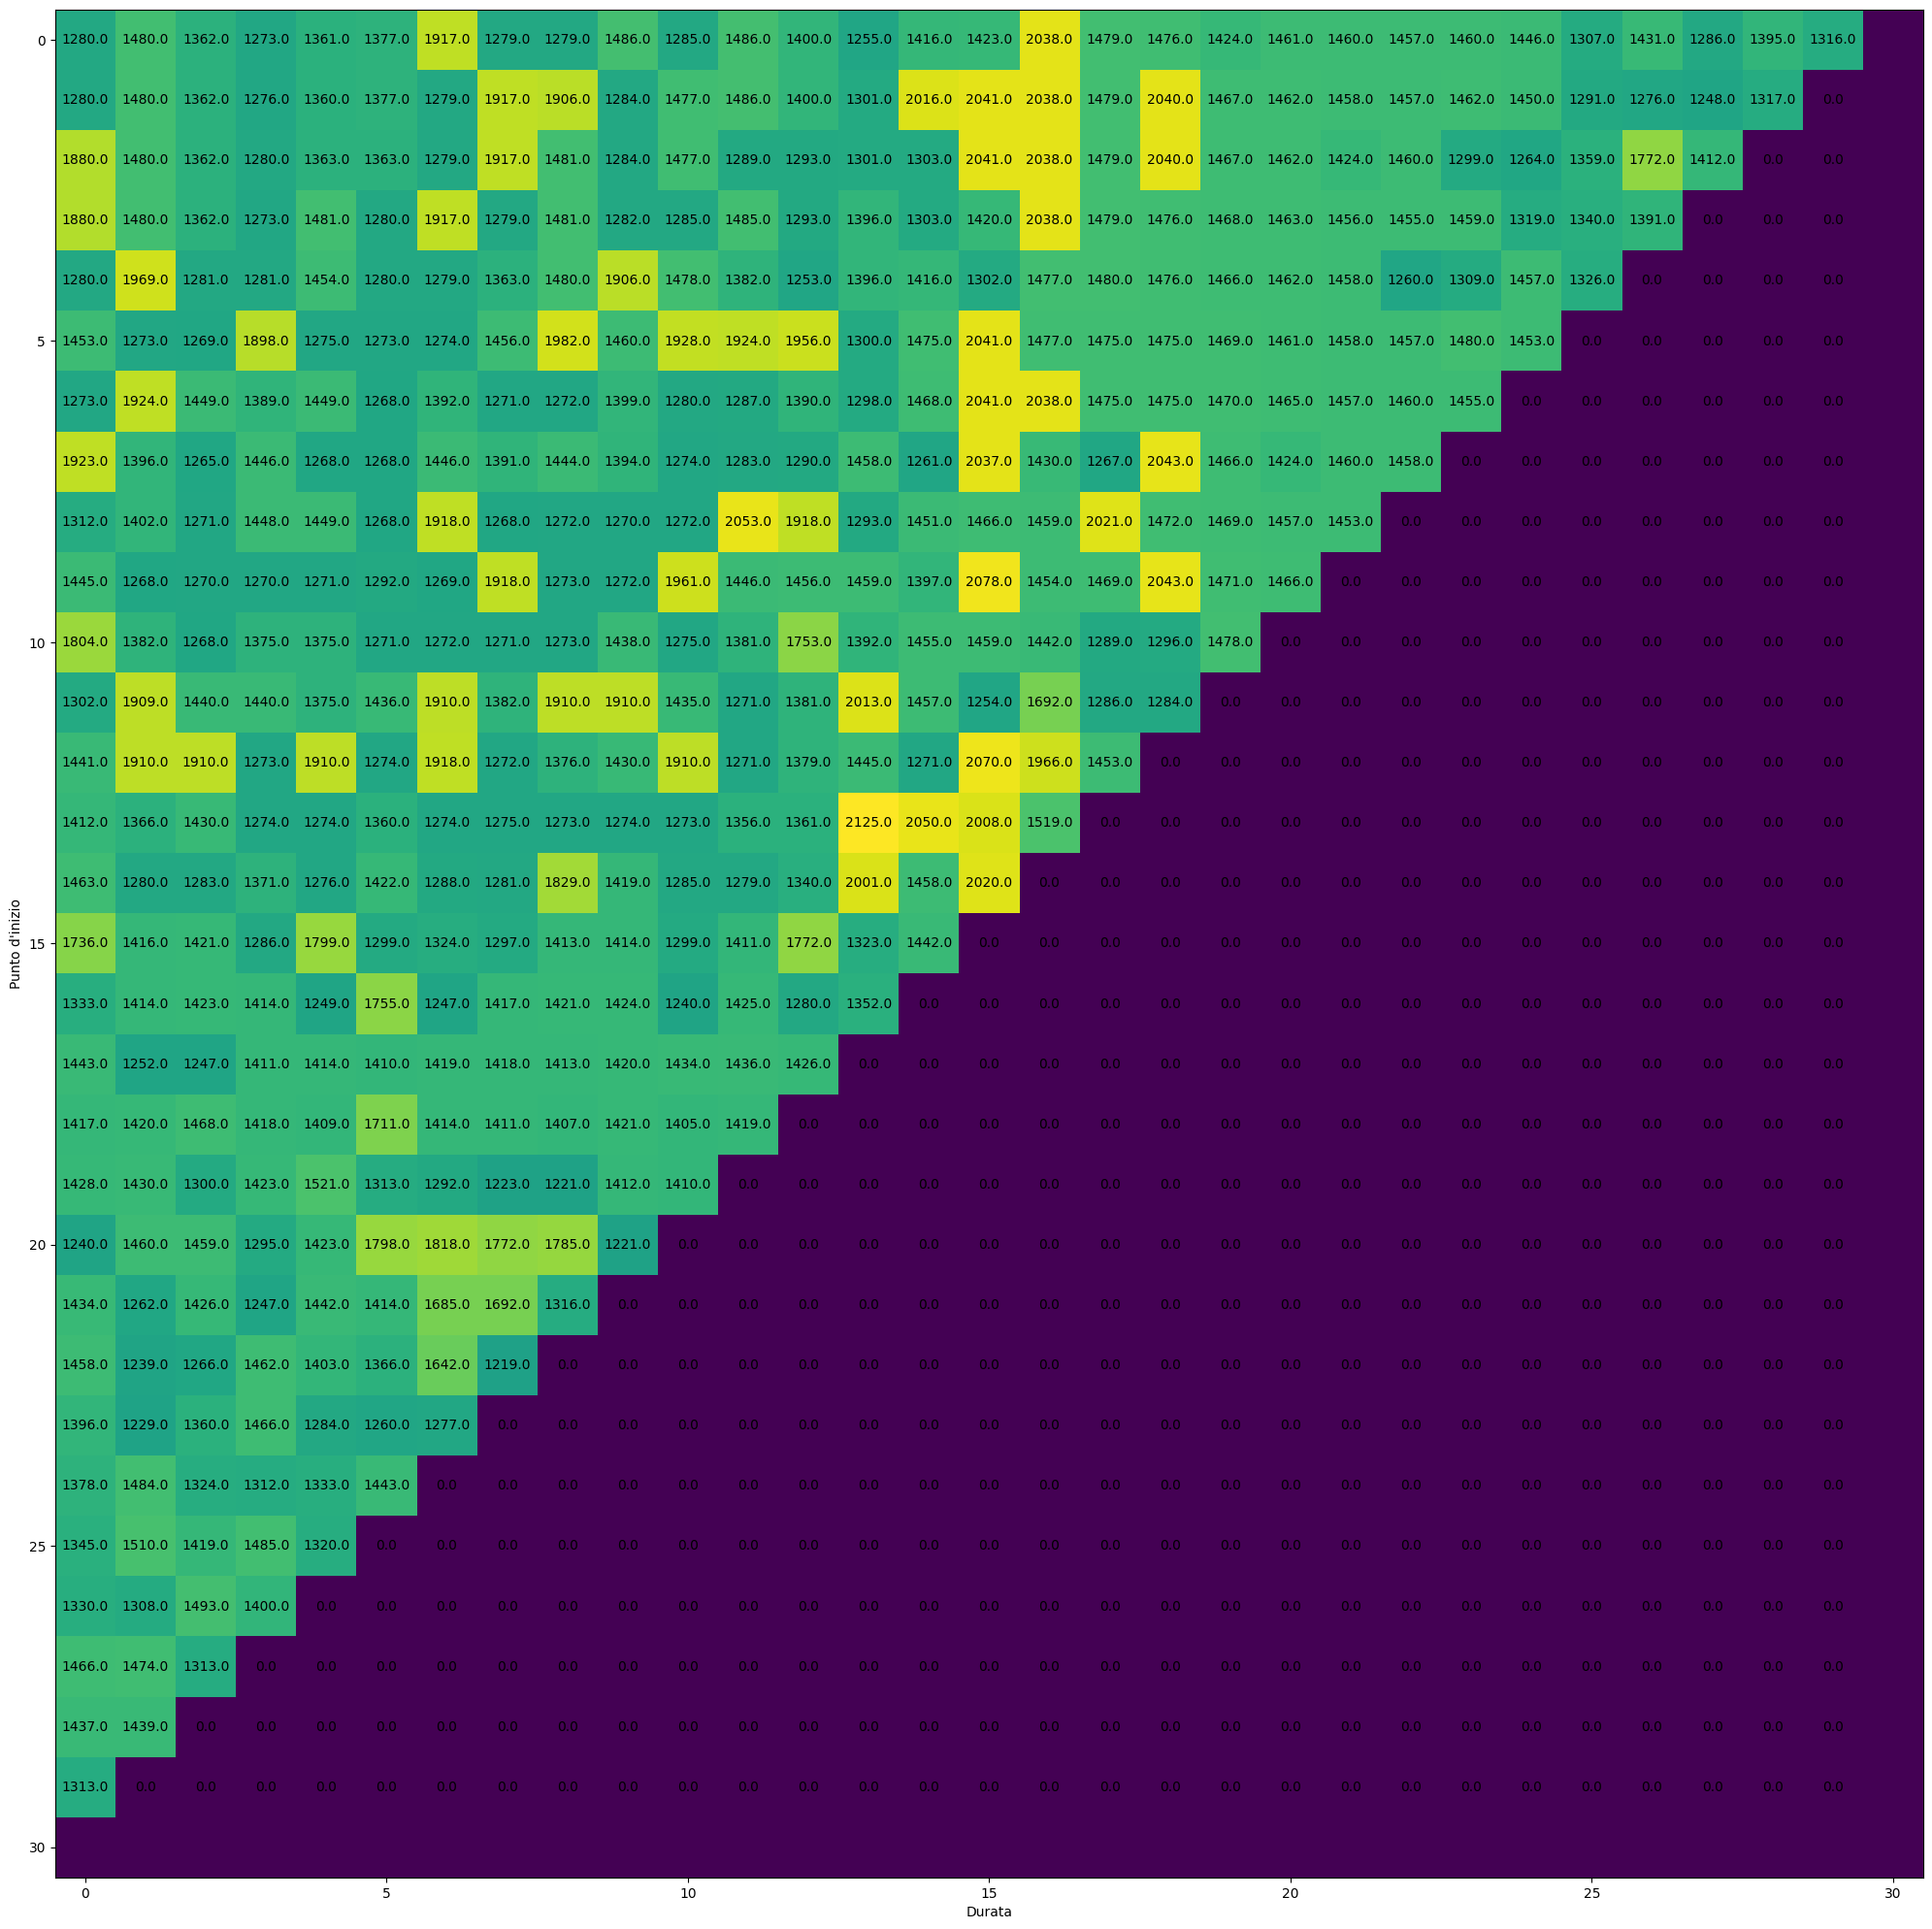

In [40]:

#m_sum_sep = np.zeros([int(155/5),int(155/5),num_cluster])

'''for cluster,y in zip(sum_separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        m_sum_sep[x,y] = a'''


for p in range(num_cluster):
    fig, ax = plt.subplots()
    image = ax.imshow(sum_separation[:,:,p])

    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(x):
        for j in range(y):
            c = np.round(sum_separation[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Calcolo della media per ogni cluster

In [50]:

cluster_mean = np.zeros([x,y,num_cluster])


'''for a,s,rese in zip(kmeans_total,newSeries_total,rese_total):
    cluster_mean.append([])
    
    meanValue = []
    for resa in rese:
        meanValue.append(np.mean(resa))
    cluster_mean[-1].append(meanValue)'''

for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for k in range(num_cluster):
                cluster_mean[i,j,k] = rese_total[i,j,k].mean()


In [51]:
from itertools import permutations
perm = list(permutations(range(num_cluster), 2))
print(list(perm))
print(perm[0][1])

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]
1


# Calcolo della separazione usando la media della distanza dei centroidi

In [52]:
import math
from itertools import permutations
perm = list(permutations(range(num_cluster), 2))

separation = np.zeros([x,y,math.comb(num_cluster, 2)])

'''for a,s,rese in zip(kmeans_total,newSeries_total,rese_total):
    separation.append([])
        
    meanValue = []
    for resa in rese:
        meanValue.append(np.mean(resa))
    separation[-1].append([])
    for a,i in zip(meanValue,range(0,num_cluster)):
        for b,j in zip(meanValue,range(0,num_cluster)):
            if( i >= j):
                continue
            else:
                separation[-1][-1].append(abs(a-b))'''


for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for cluster_couple,index in zip(perm,range(math.comb(num_cluster, 2))):        
                separation[i,j,index]= abs(cluster_mean[i,j,cluster_couple[0]]-cluster_mean[i,j,cluster_couple[1]])

In [ ]:
'''m_separation = np.zeros([int(155/5),int(155/5),math.comb(num_cluster, 2)])

for cluster,y in zip(separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_separation[x,y,z] = c'''

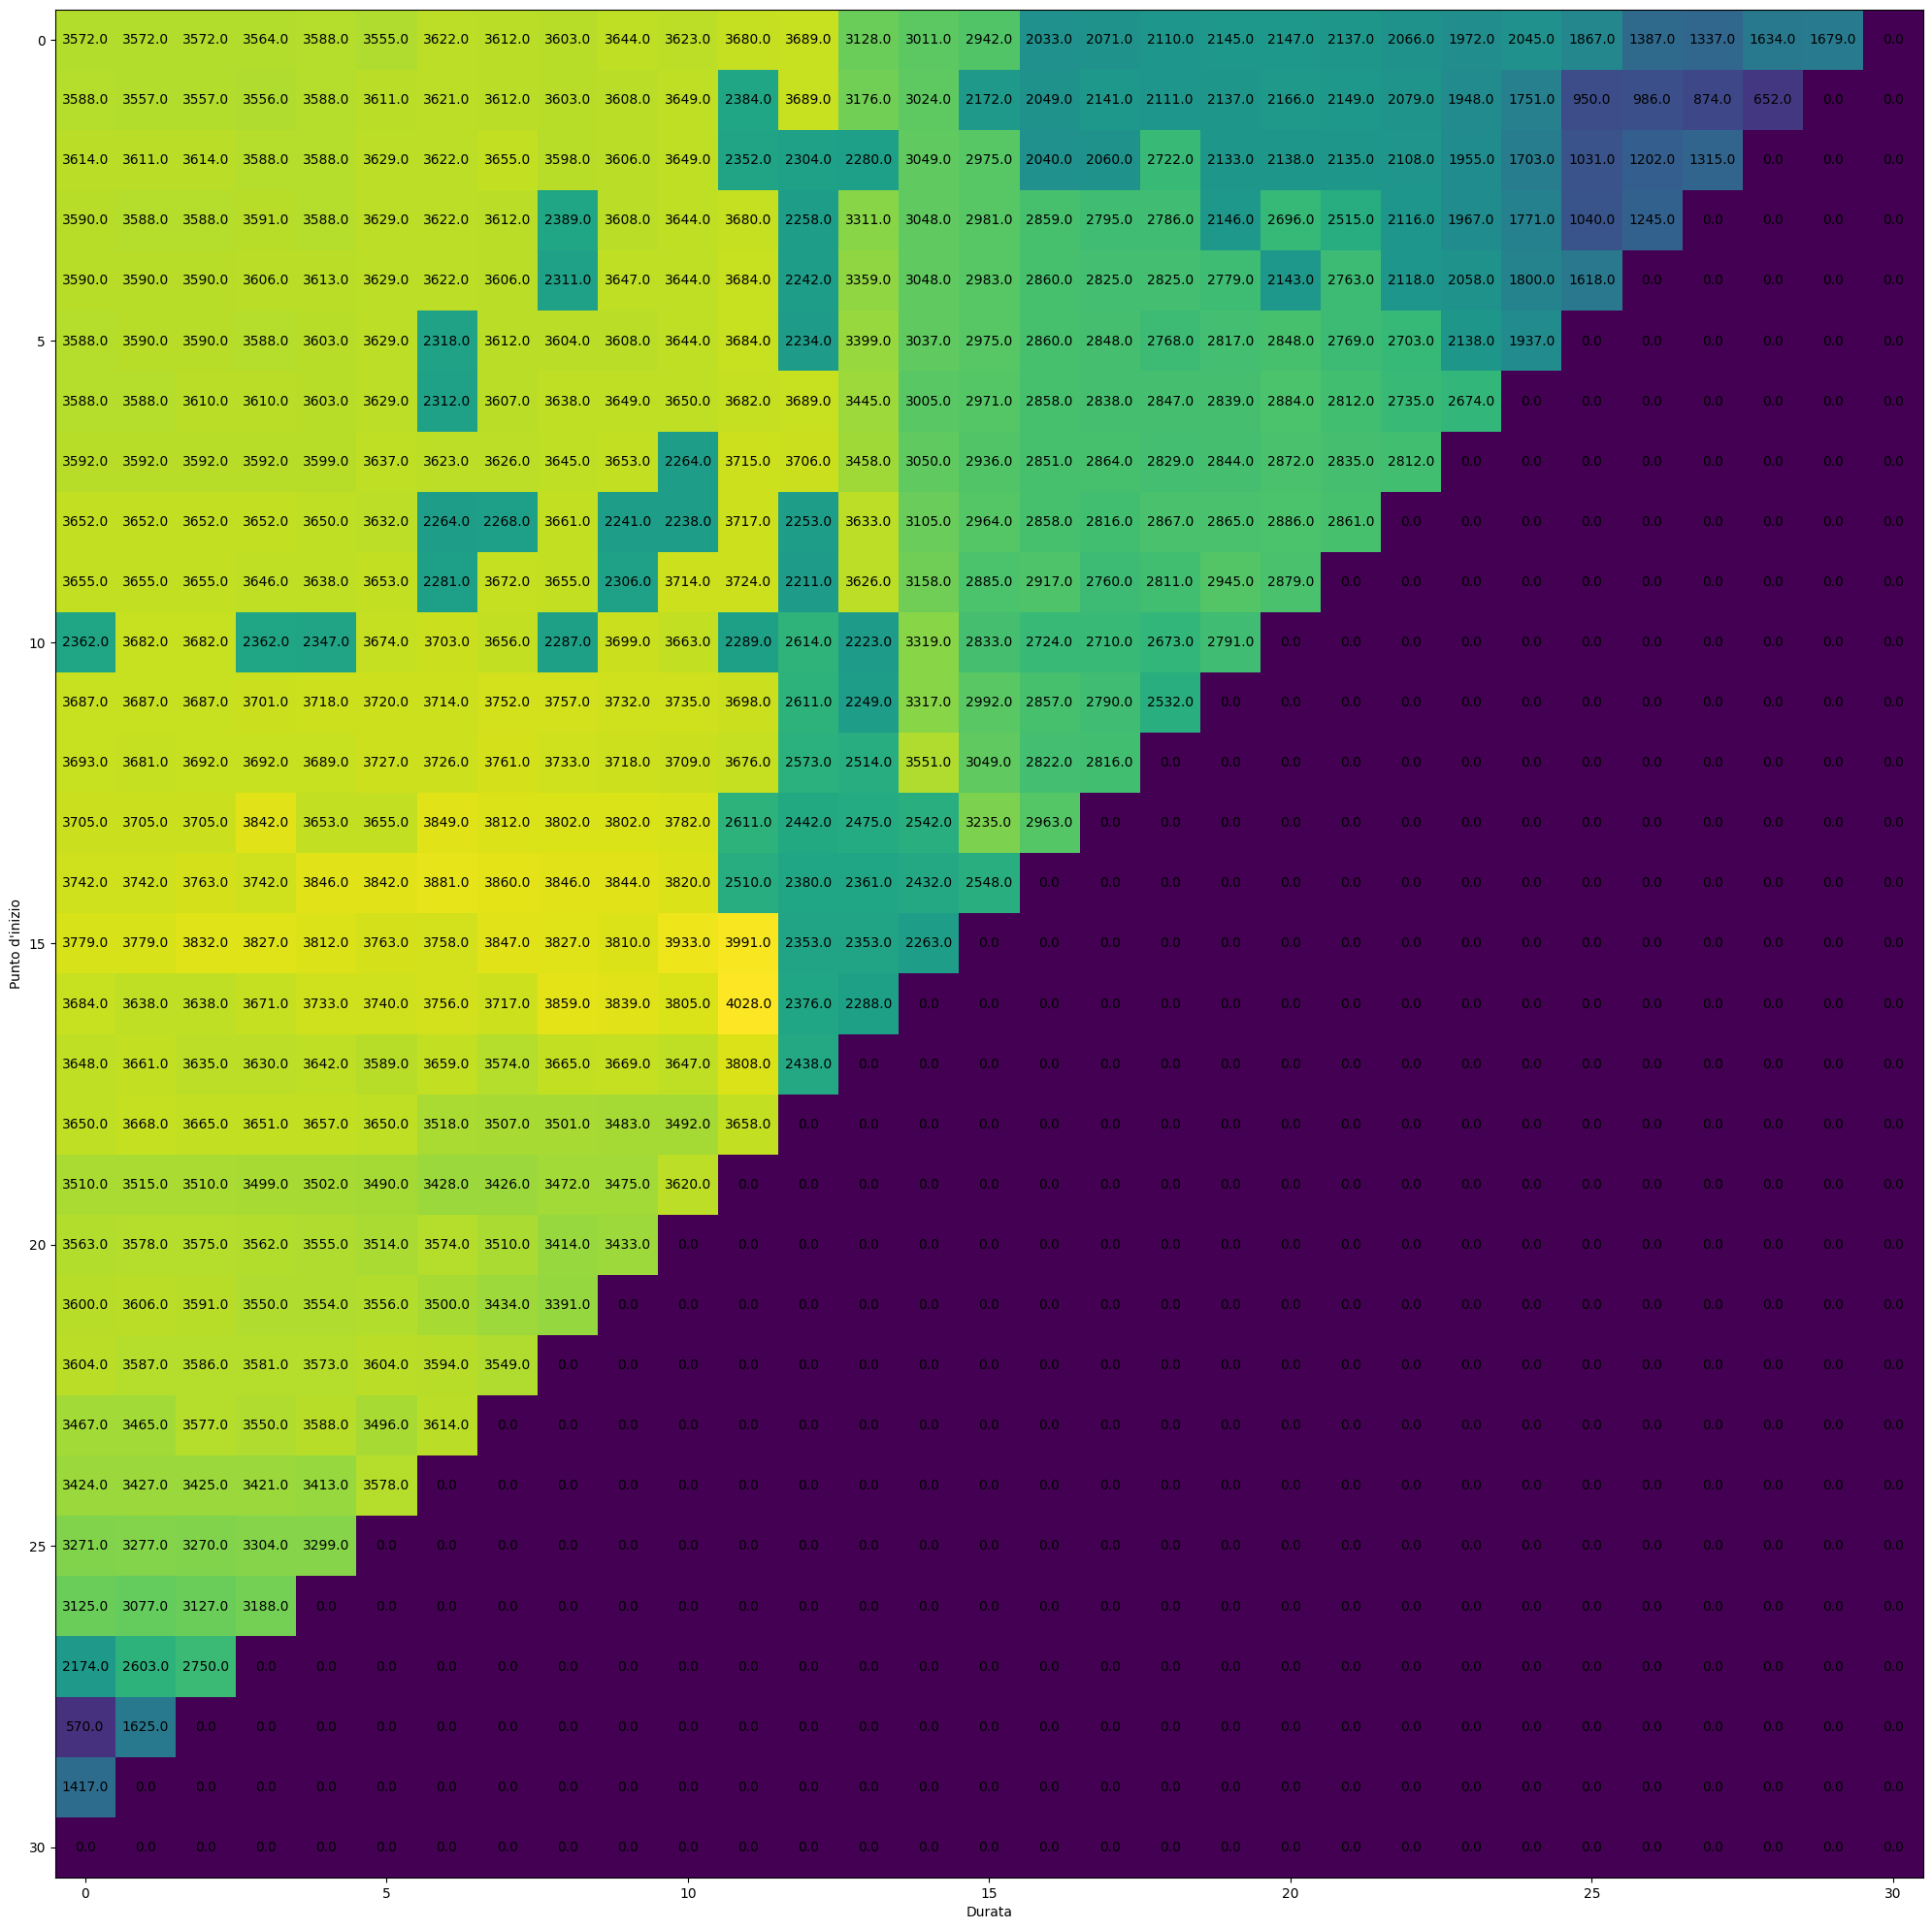

In [ ]:

fig, ax = plt.subplots()

total = 0
for p in range(0,num_cluster):
    total += m_separation[:,:,p]

mean_separation = total/num_cluster
image = ax.imshow(total)


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,total.shape[0]):
    for j in range(0,total.shape[1]):
        c = np.round(total[i,j],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

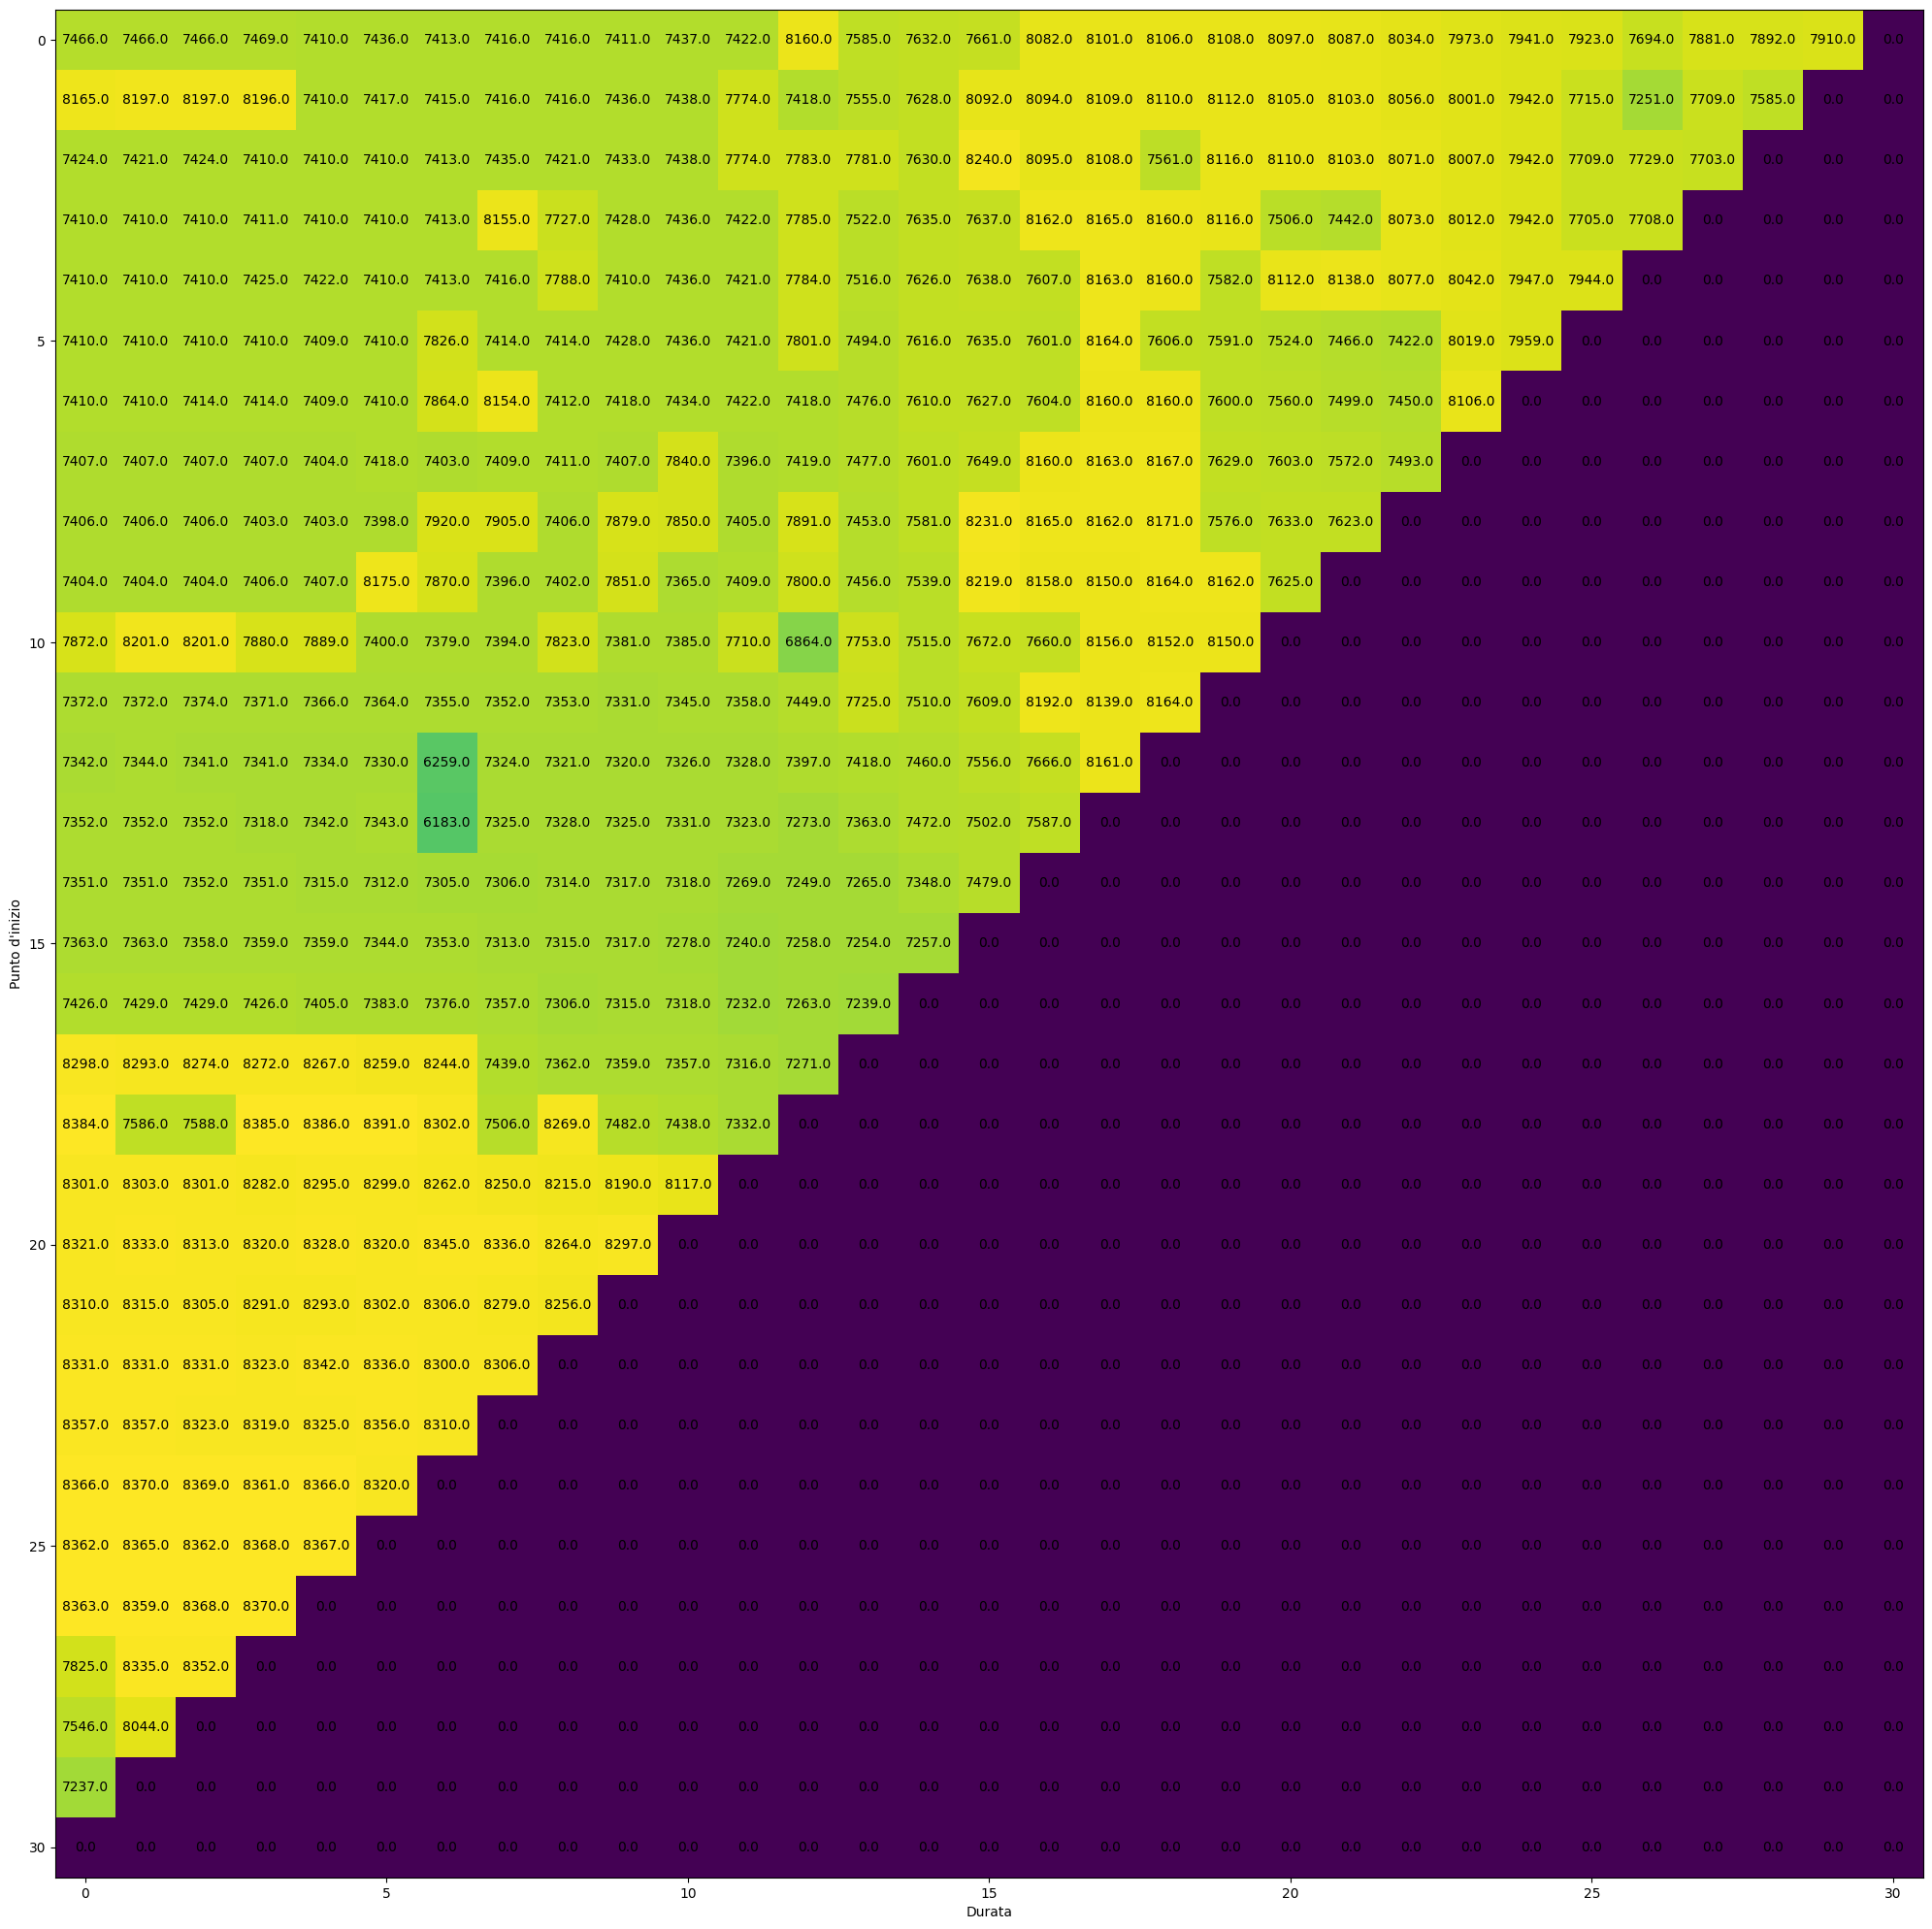

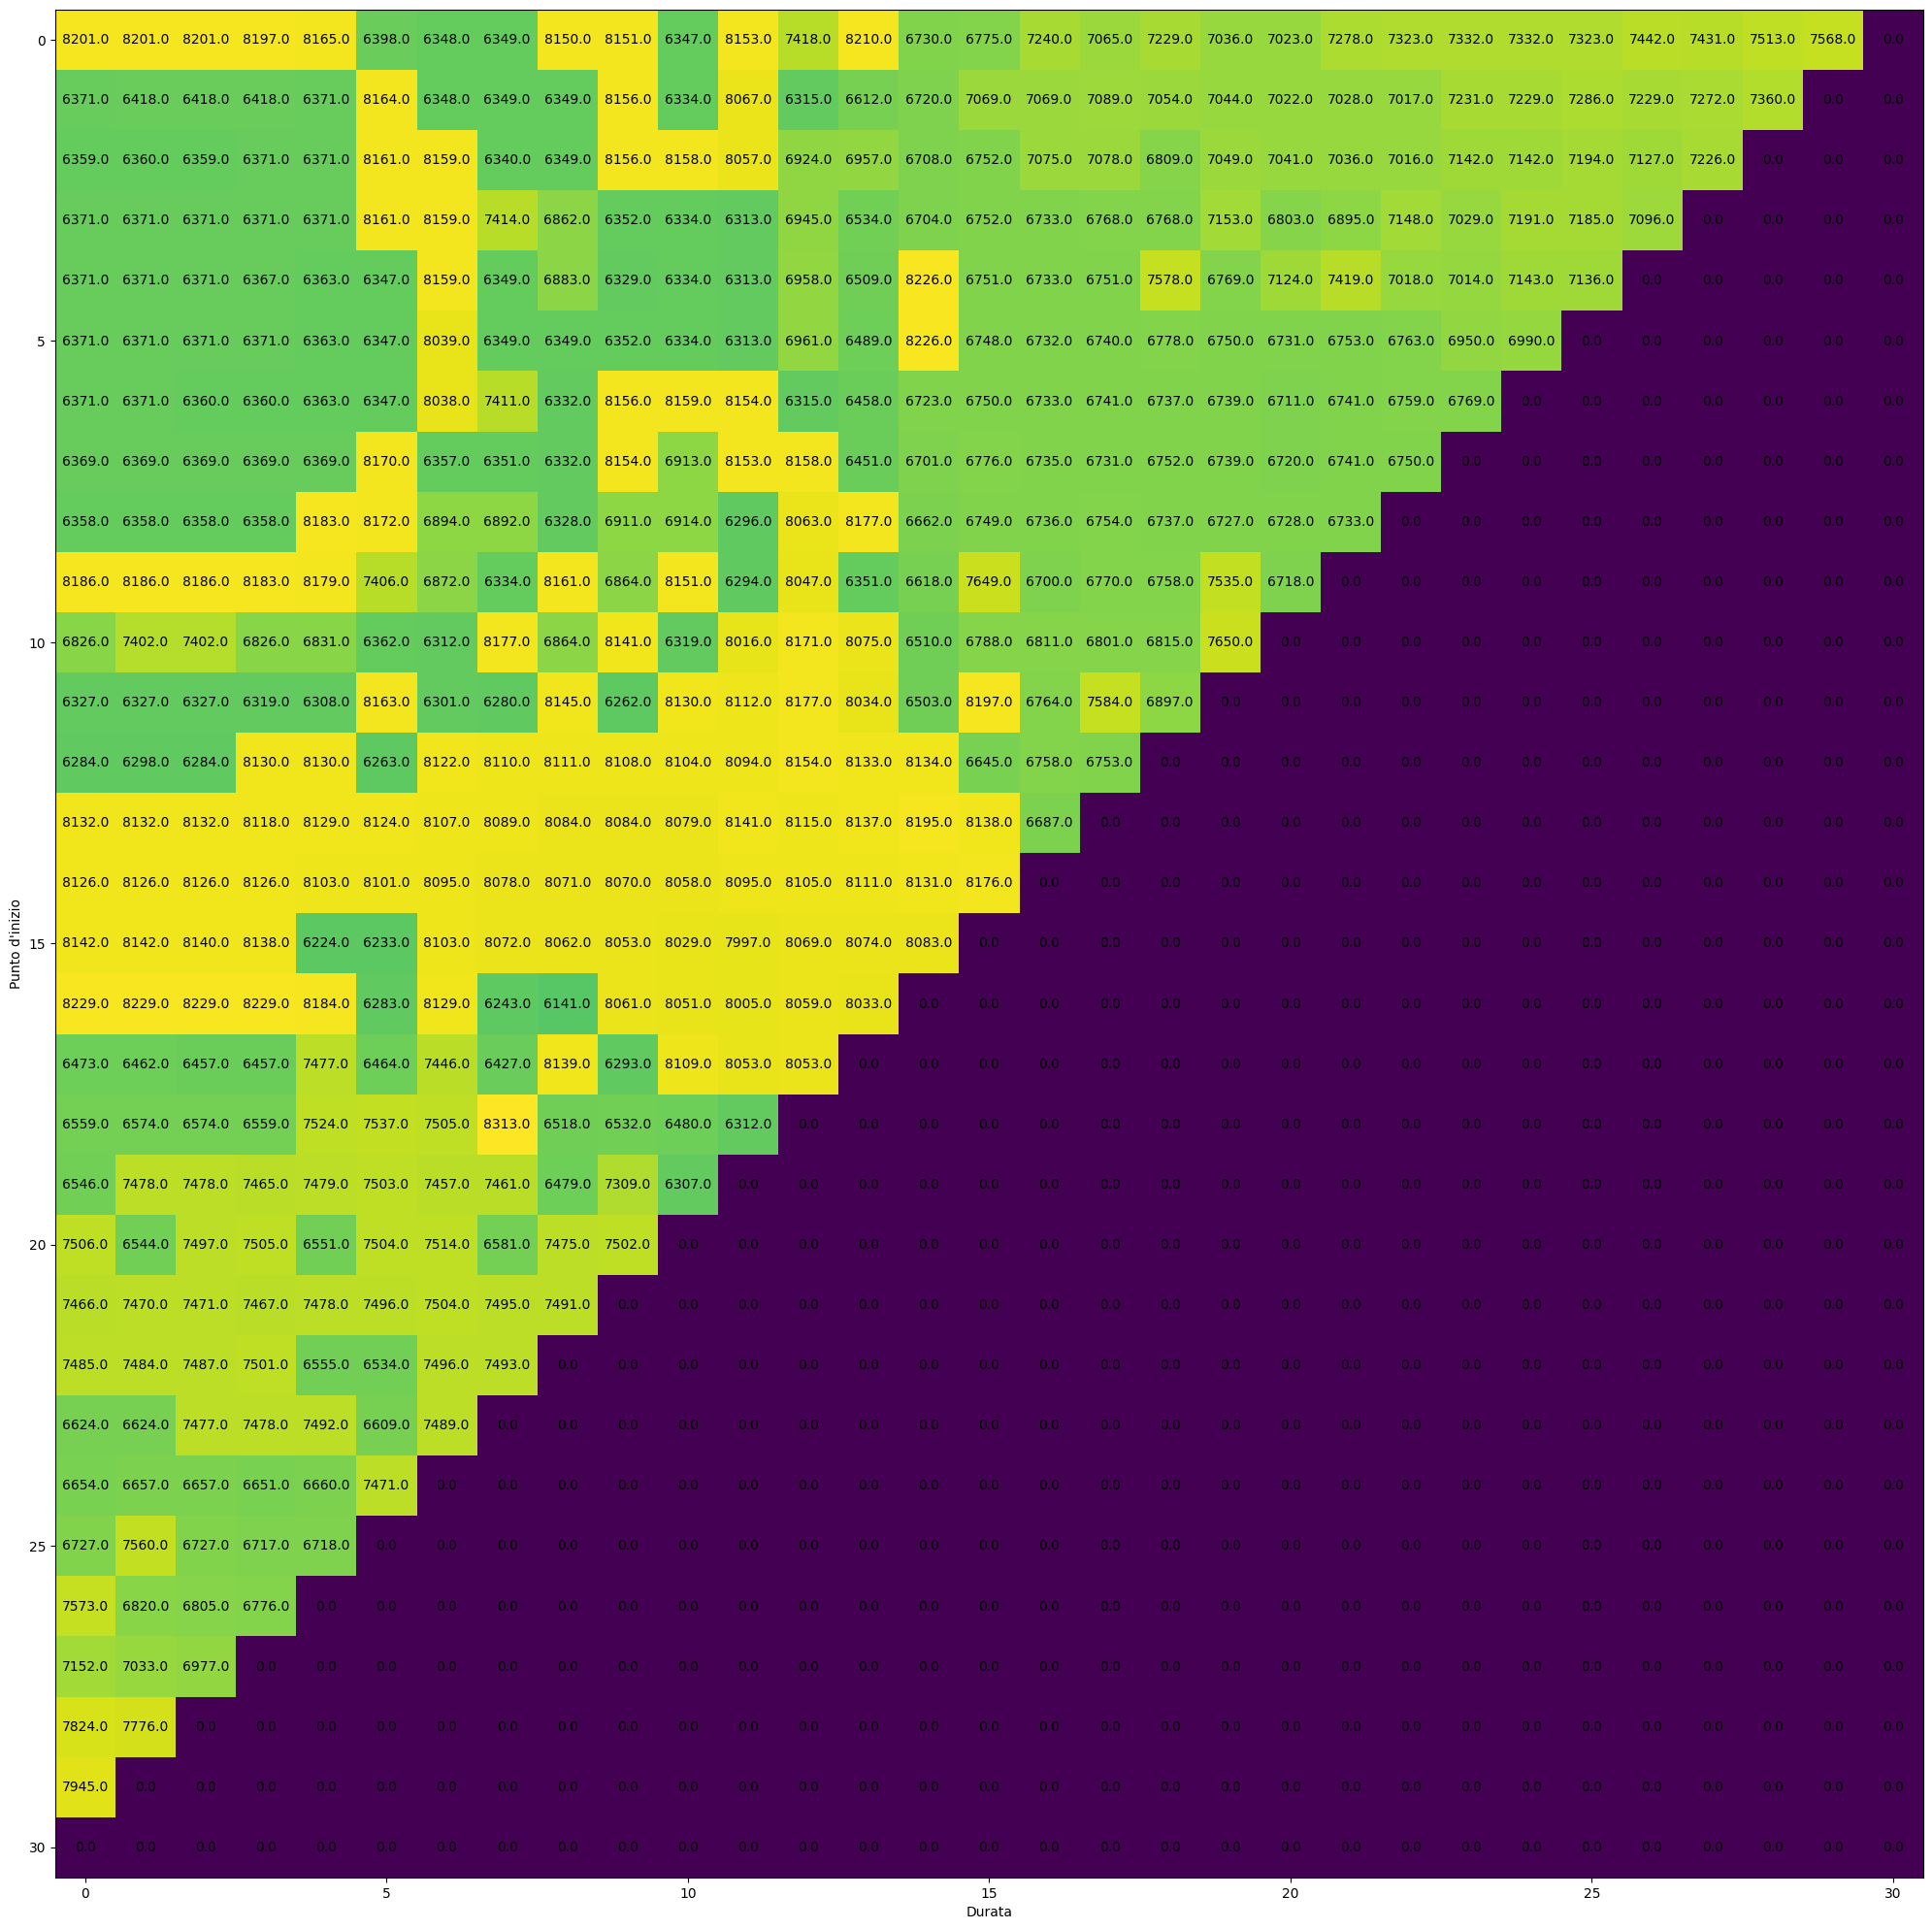

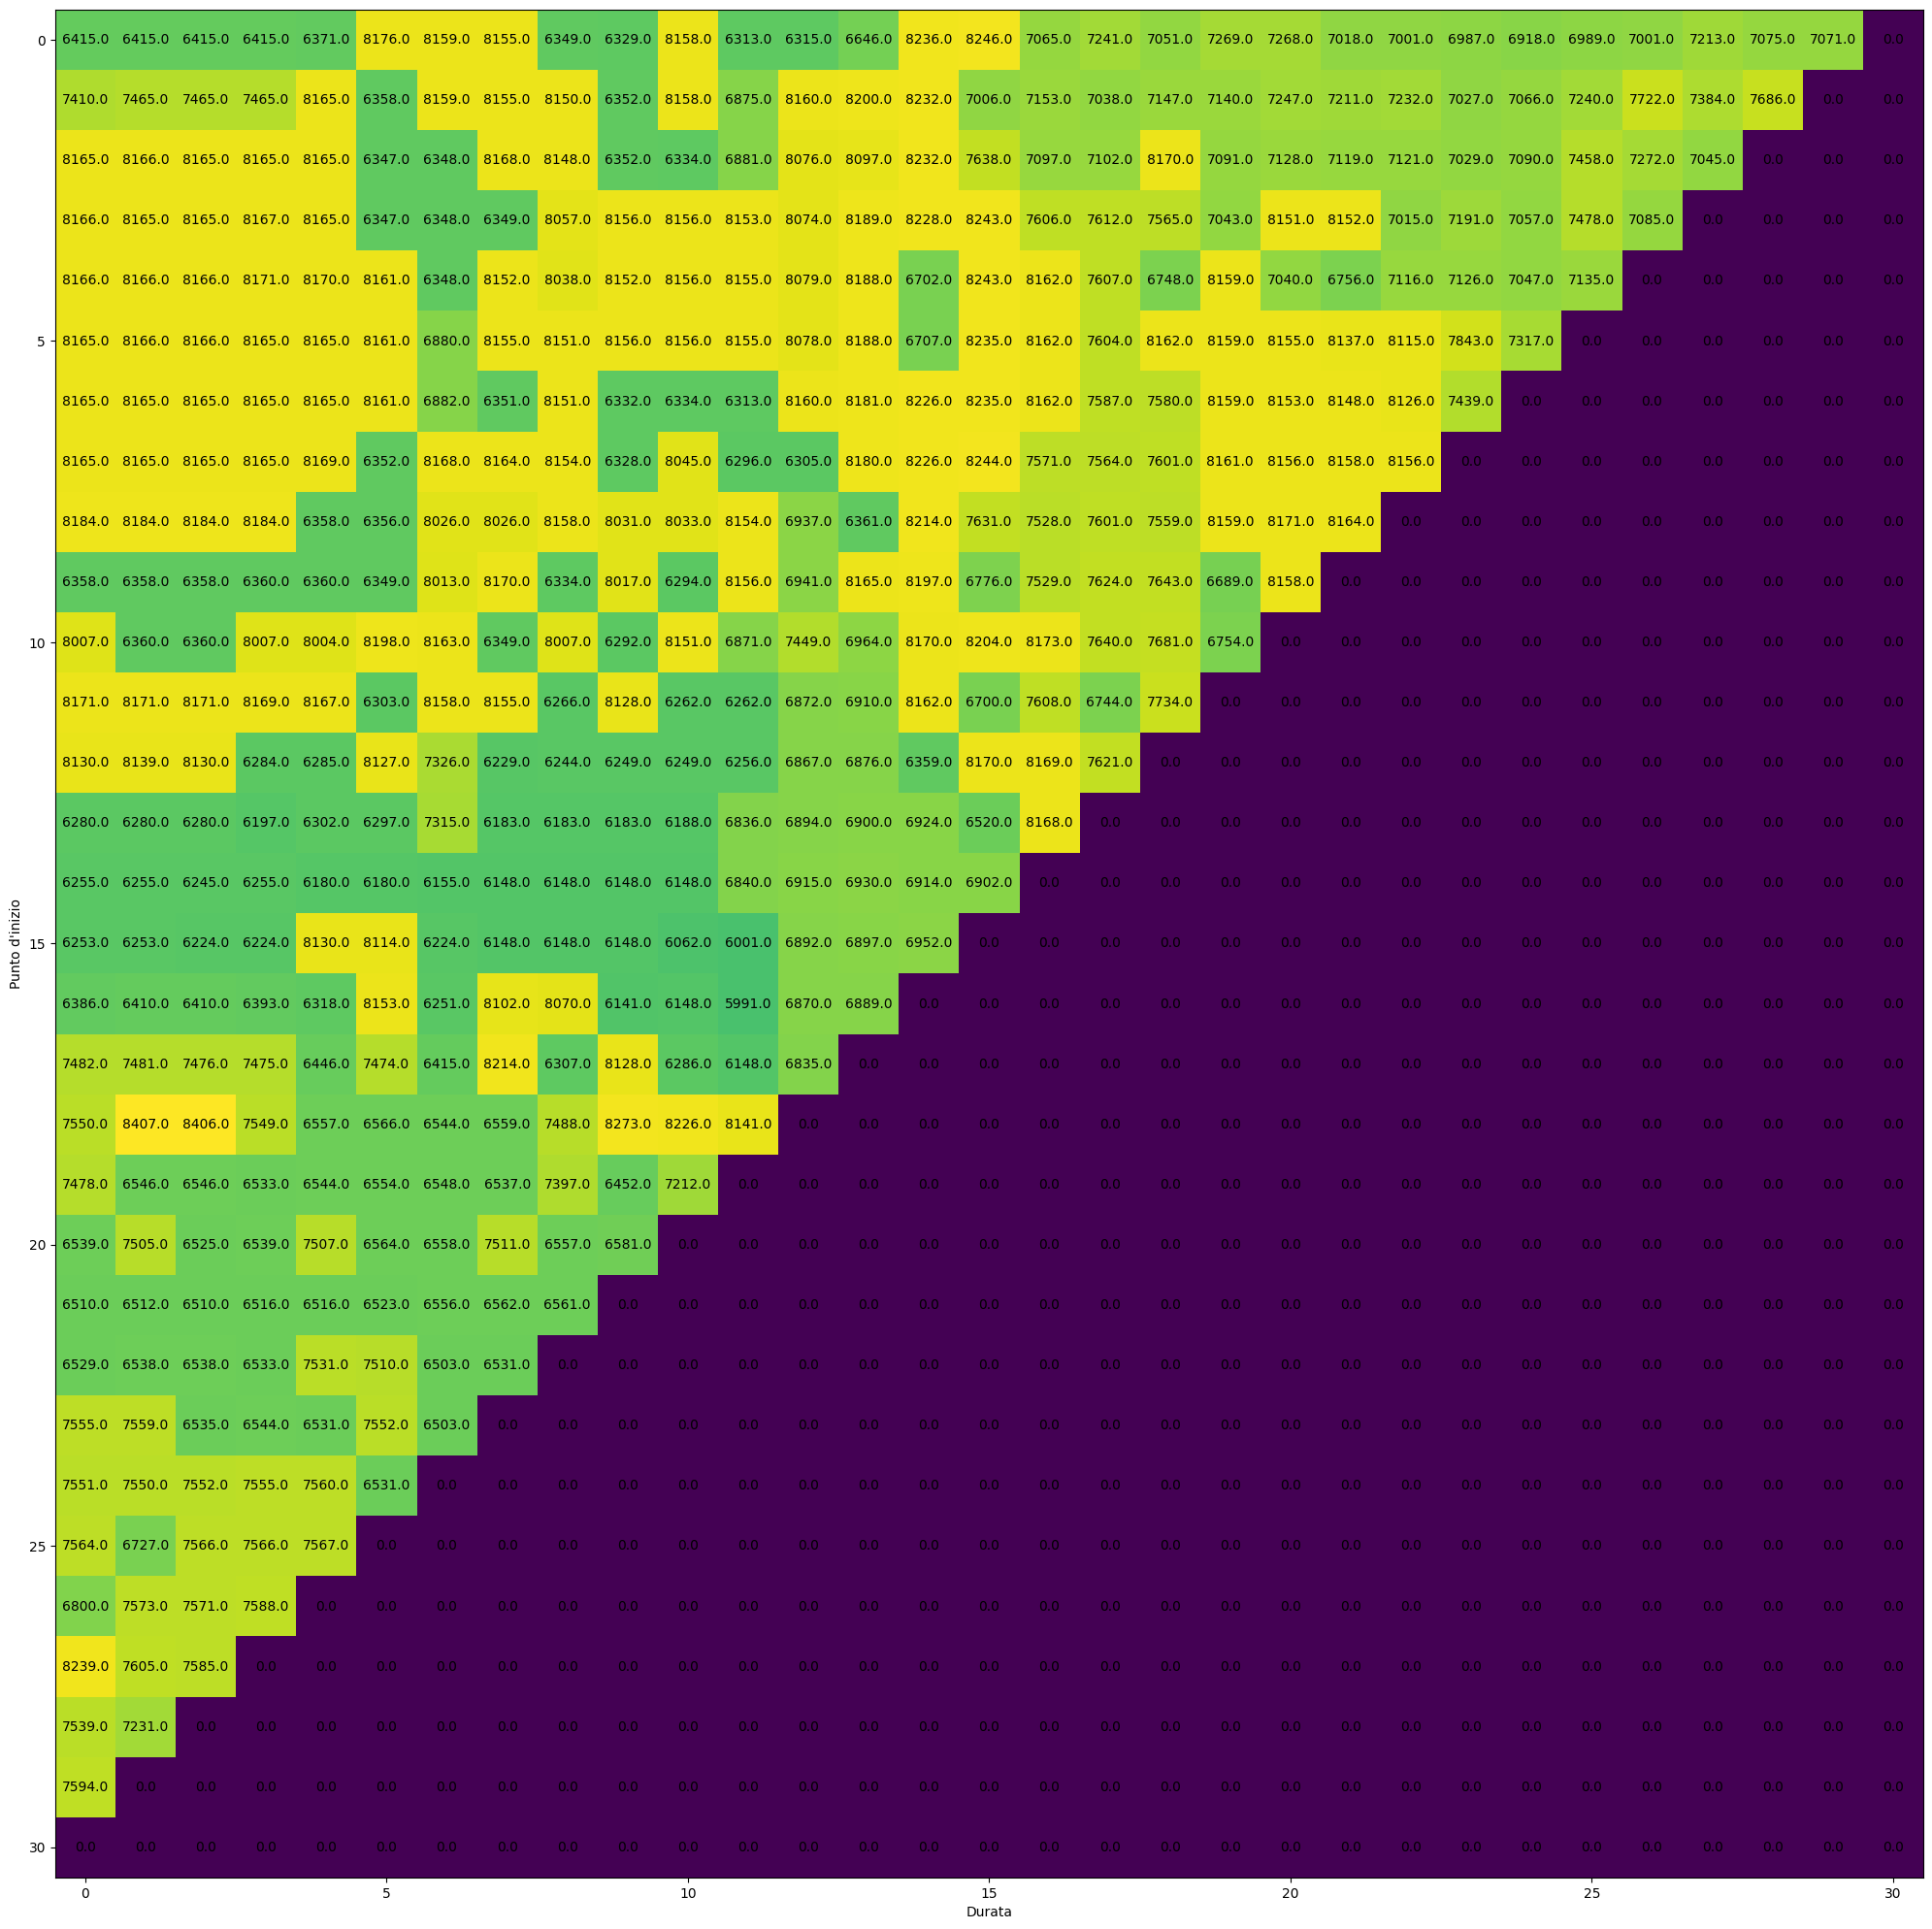

In [ ]:
# Andiamo a stampare le medie per ogni cluster

m_mean = np.zeros([int(155/5),int(155/5),num_cluster])

for cluster,y in zip(cluster_mean,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_mean[x,y,z] = c


for p in range(0,num_cluster):
    fig, ax = plt.subplots()

    image = ax.imshow(m_mean[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,m_mean.shape[0]):
        for j in range(0,m_mean.shape[1]):
            c = np.round(m_mean[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Rappresentazione della deviazione standard e della media in uno scatter plot

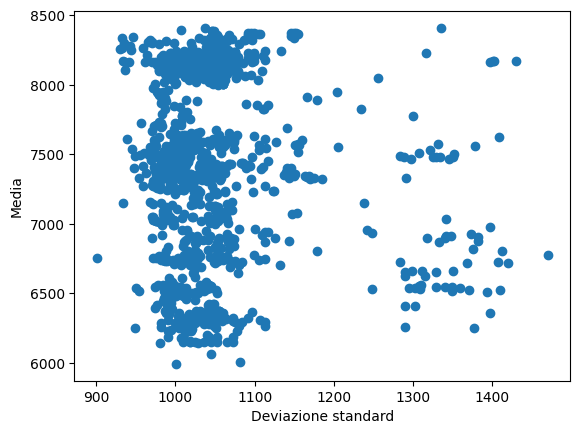

In [ ]:
x = m_deviation[m_deviation > 0].flatten()

y = m_mean[m_mean > 0].flatten()

plt.xlabel("Deviazione standard")
plt.ylabel("Media")

plt.scatter(x, y)
plt.show()